In [2]:
import pandas as pd
import numpy as np
import xlwings as xw

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (24,12)
plt.rcParams['lines.linewidth'] = 3

In [4]:
def excel(name):
    app = xw.App(visible=False)
    wb = xw.Book(name)
    sheet = wb.sheets[0]
    df = sheet.range('A1').options(pd.DataFrame, expand='table').value
    app.kill()
    print('Excel load success')
    return df

In [5]:
def data_split(data, win_size=365):
    split_list = []
    num = 0
    for i in range(int(len(data)/win_size)):
        start = data.index[num]
        end = data.index[num+win_size+1]

        tmp = data[start:end]
        split_list.append(tmp)

        num = num + win_size -1
    
    return split_list

In [6]:
data_list = [
'DGS1 1962-01-02 Price',
'DGS2 1976-06-01 Price',
'DGS3 1962-01-02 Price',
'DGS5 1962-01-02 Price',
'DGS10 1962-01-02 Price',
'DGS20 1962-01-02 Price',
'DGS30 1977-02-15 Price',
'Gold Futures Data 1979-12-27 Preprocessed',
'S&P GSCI Commodity Total Return Data 1979-12-27 Preprocessed',
'US Dollar Index Data 1979-12-26',
'Wilshire 5000 Large 1978-06-30',
'Wilshire 5000 Micro 1978-06-30',
'Wilshire 5000 Mid 1978-06-30',
'Wilshire 5000 Small 1978-06-30'
]

data_name = [
'DGS1','DGS2','DGS3','DGS5','DGS10','DGS20','DGS30',
'Gold','Commodity','Dollar',
'Wilshire Large','Wilshire Micro','Wilshire Mid','Wilshire Small'
]

In [55]:
for i in range(len(data_list)):
    if i == 0:
        name = data_list[0]
        data = pd.read_csv(name + '.csv', index_col ='Date')
        data = pd.DataFrame(data[data.columns[0]])
        data.columns = [data_name[i]]
        data.index = pd.to_datetime(data.index)

        data_calender = pd.date_range(start='1960-01-01', end='2022-01-01', freq='D')
        data_dummy = pd.DataFrame([0 for i in range(len(data_calender))])
        data_dummy.index = data_calender

        data = data_dummy.join(data[data_name[0]])
        data = data.drop([0], axis=1)

    else:
        name = data_list[i]
        tmp = pd.read_csv(name + '.csv', index_col='Date')
        tmp = pd.DataFrame(tmp[tmp.columns[0]])
        tmp.columns = [data_name[i]]
        tmp.index = pd.to_datetime(tmp.index)

        data = data.join(tmp[data_name[i]])


In [56]:
data = data['2000-01-01':'2021-12-31']

In [57]:
for i in range (len(data.columns)):
    data[data.columns[i]] = data[data.columns[i]].apply(lambda x: (str(x).replace(',','')) )
    data[data.columns[i]] = data[data.columns[i]].apply(lambda x: np.nan if x=='.' else x )
    data[data.columns[i]] = data[data.columns[i]].apply(lambda x: float(x))

In [59]:
data = data.pct_change()

In [60]:
test = data_split(data, win_size = 120)

In [61]:
test[0].corr()

DGS1      DGS2      DGS3      DGS5     DGS10     DGS20  \
DGS1            1.000000  0.824520  0.786907  0.754550  0.657139  0.486100   
DGS2            0.824520  1.000000  0.966573  0.906985  0.783050  0.545346   
DGS3            0.786907  0.966573  1.000000  0.947768  0.816349  0.582887   
DGS5            0.754550  0.906985  0.947768  1.000000  0.910575  0.723703   
DGS10           0.657139  0.783050  0.816349  0.910575  1.000000  0.838844   
DGS20           0.486100  0.545346  0.582887  0.723703  0.838844  1.000000   
DGS30           0.491238  0.514192  0.570719  0.727954  0.823564  0.955156   
Gold            0.167271  0.088215  0.061962  0.037897  0.043780  0.003344   
Commodity      -0.099660 -0.101812 -0.124825 -0.186944 -0.204516 -0.231059   
Dollar         -0.308886 -0.302795 -0.352071 -0.325341 -0.298252 -0.105116   
Wilshire Large -0.186602 -0.310670 -0.294196 -0.290642 -0.259118 -0.138327   
Wilshire Micro -0.246967 -0.324160 -0.329279 -0.310225 -0.241152 -0.052586   
Wilshire Mid   -0.181034 -0.319035 -0.311364 -0.313286 -0.273941 -0.117561   
Wilshire Small -0.182844 -0.331328 -0.326353 -0.325047 -0.284250 -0.113564   

                   DGS30      Gold  Commodity    Dollar  Wilshire Large  \
DGS1            0.491238  0.167271  -0.099660 -0.308886       -0.186602   
DGS2            0.514192  0.088215  -0.101812 -0.302795       -0.310670   
DGS3            0.570719  0.061962  -0.124825 -0.352071       -0.294196   
DGS5            0.727954  0.037897  -0.186944 -0.325341       -0.290642   
DGS10           0.823564  0.043780  -0.204516 -0.298252       -0.259118   
DGS20           0.955156  0.003344  -0.231059 -0.105116       -0.138327   
DGS30           1.000000 -0.021406  -0.247441 -0.167574       -0.105459   
Gold           -0.021406  1.000000   0.240141 -0.127456       -0.062470   
Commodity      -0.247441  0.240141   1.000000 -0.036561        0.063369   
Dollar         -0.167574 -0.127456  -0.036561  1.000000        0.080734   
Wilshire Large -0.105459 -0.062470   0.063369  0.080734        1.000000   
Wilshire Micro -0.040688 -0.039772   0.249586  0.110865        0.596482   
Wilshire Mid   -0.091199 -0.070087   0.261354  0.097177        0.799426   
Wilshire Small -0.088336 -0.057801   0.257697  0.110192        0.739573   

                Wilshire Micro  Wilshire Mid  Wilshire Small  
DGS1                 -0.246967     -0.181034       -0.182844  
DGS2                 -0.324160     -0.319035       -0.331328  
DGS3                 -0.329279     -0.311364       -0.326353  
DGS5                 -0.310225     -0.313286       -0.325047  
DGS10                -0.241152     -0.273941       -0.284250  
DGS20                -0.052586     -0.117561       -0.113564  
DGS30                -0.040688     -0.091199       -0.088336  
Gold                 -0.039772     -0.070087       -0.057801  
Commodity             0.249586      0.261354        0.257697  
Dollar                0.110865      0.097177        0.110192  
Wilshire Large        0.596482      0.799426        0.739573  
Wilshire Micro        1.000000      0.893719        0.930766  
Wilshire Mid          0.893719      1.000000        0.983875  
Wilshire Small        0.930766      0.983875        1.000000

In [62]:
corr = test[0].corr()
for j in range(len(corr.columns)):
    corr[corr.columns[j]] = corr[corr.columns[j]].apply(lambda x: np.sign(x)*abs(x)**1.5)
corr

DGS1      DGS2      DGS3      DGS5     DGS10     DGS20  \
DGS1            1.000000  0.748689  0.698047  0.655438  0.532703  0.338913   
DGS2            0.748689  1.000000  0.950281  0.863774  0.692922  0.402725   
DGS3            0.698047  0.950281  1.000000  0.922683  0.737588  0.445017   
DGS5            0.655438  0.863774  0.922683  1.000000  0.868908  0.615660   
DGS10           0.532703  0.692922  0.737588  0.868908  1.000000  0.768284   
DGS20           0.338913  0.402725  0.445017  0.615660  0.768284  1.000000   
DGS30           0.344301  0.368713  0.431155  0.621092  0.747388  0.933494   
Gold            0.068412  0.026201  0.015424  0.007377  0.009161  0.000193   
Commodity      -0.031462 -0.032486 -0.044102 -0.080829 -0.092489 -0.111067   
Dollar         -0.171671 -0.166618 -0.208903 -0.185570 -0.162883 -0.034080   
Wilshire Large -0.080608 -0.173160 -0.159572 -0.156689 -0.131900 -0.051447   
Wilshire Micro -0.122732 -0.184561 -0.188950 -0.172788 -0.118423 -0.012059   
Wilshire Mid   -0.077026 -0.180201 -0.173741 -0.175352 -0.143379 -0.040308   
Wilshire Small -0.078185 -0.190716 -0.186437 -0.185318 -0.151548 -0.038270   

                   DGS30      Gold  Commodity    Dollar  Wilshire Large  \
DGS1            0.344301  0.068412  -0.031462 -0.171671       -0.080608   
DGS2            0.368713  0.026201  -0.032486 -0.166618       -0.173160   
DGS3            0.431155  0.015424  -0.044102 -0.208903       -0.159572   
DGS5            0.621092  0.007377  -0.080829 -0.185570       -0.156689   
DGS10           0.747388  0.009161  -0.092489 -0.162883       -0.131900   
DGS20           0.933494  0.000193  -0.111067 -0.034080       -0.051447   
DGS30           1.000000 -0.003132  -0.123086 -0.068598       -0.034247   
Gold           -0.003132  1.000000   0.117679 -0.045503       -0.015614   
Commodity      -0.123086  0.117679   1.000000 -0.006991        0.015952   
Dollar         -0.068598 -0.045503  -0.006991  1.000000        0.022940   
Wilshire Large -0.034247 -0.015614   0.015952  0.022940        1.000000   
Wilshire Micro -0.008207 -0.007932   0.124690  0.036914        0.460676   
Wilshire Mid   -0.027541 -0.018555   0.133611  0.030293        0.714772   
Wilshire Small -0.026255 -0.013896   0.130817  0.036579        0.636021   

                Wilshire Micro  Wilshire Mid  Wilshire Small  
DGS1                 -0.122732     -0.077026       -0.078185  
DGS2                 -0.184561     -0.180201       -0.190716  
DGS3                 -0.188950     -0.173741       -0.186437  
DGS5                 -0.172788     -0.175352       -0.185318  
DGS10                -0.118423     -0.143379       -0.151548  
DGS20                -0.012059     -0.040308       -0.038270  
DGS30                -0.008207     -0.027541       -0.026255  
Gold                 -0.007932     -0.018555       -0.013896  
Commodity             0.124690      0.133611        0.130817  
Dollar                0.036914      0.030293        0.036579  
Wilshire Large        0.460676      0.714772        0.636021  
Wilshire Micro        1.000000      0.844893        0.897967  
Wilshire Mid          0.844893      1.000000        0.975910  
Wilshire Small        0.897967      0.975910        1.000000

2000-01-01 00:00:00 ~ 2000-05-01 00:00:00


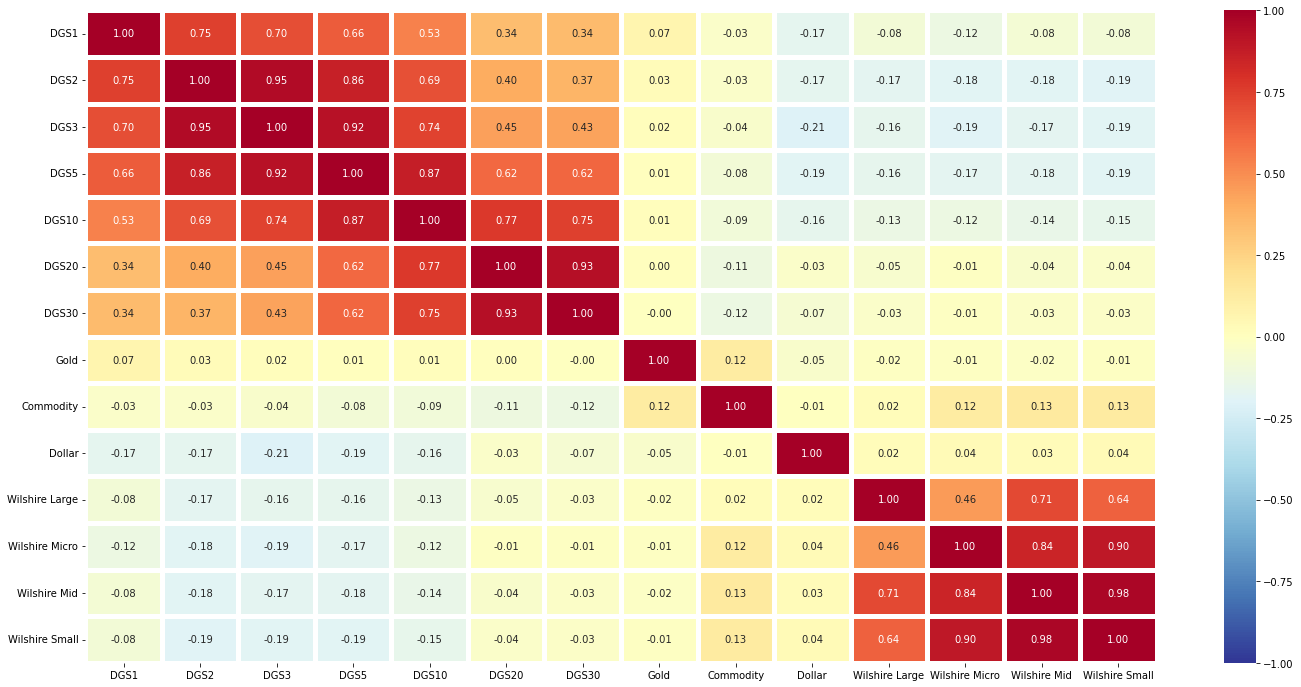

2000-04-29 00:00:00 ~ 2000-08-28 00:00:00


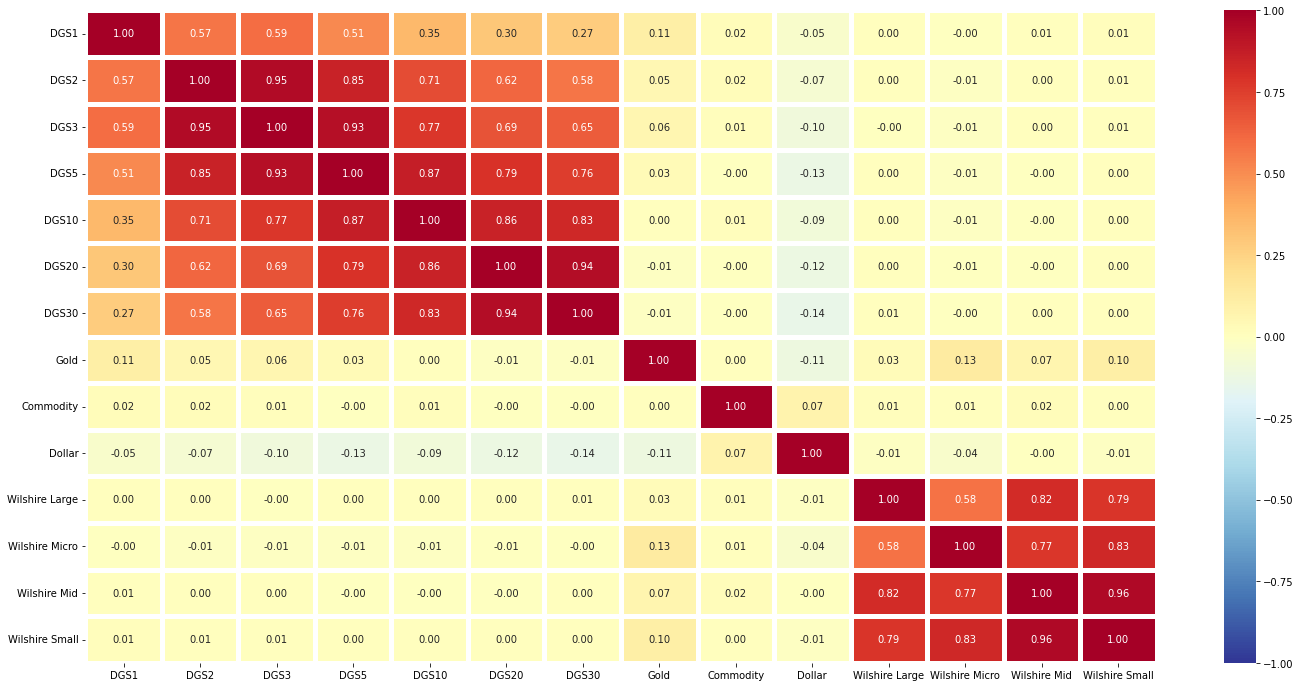

2000-08-26 00:00:00 ~ 2000-12-25 00:00:00


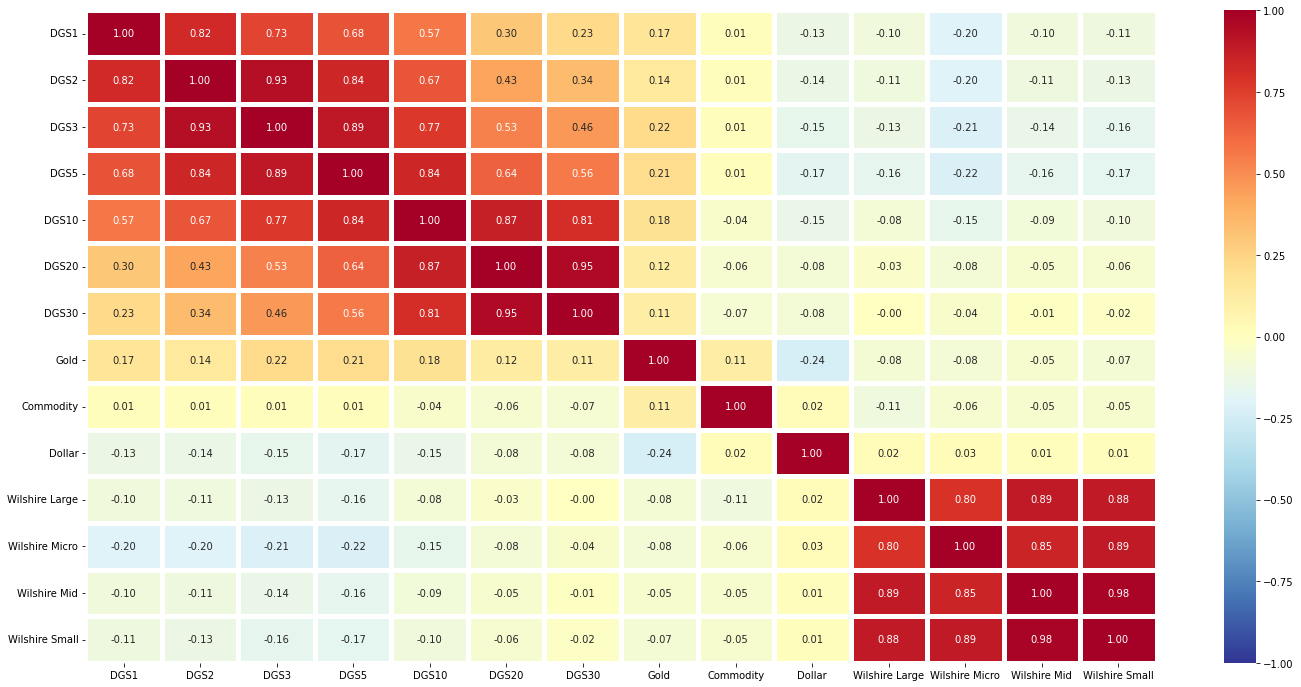

2000-12-23 00:00:00 ~ 2001-04-23 00:00:00


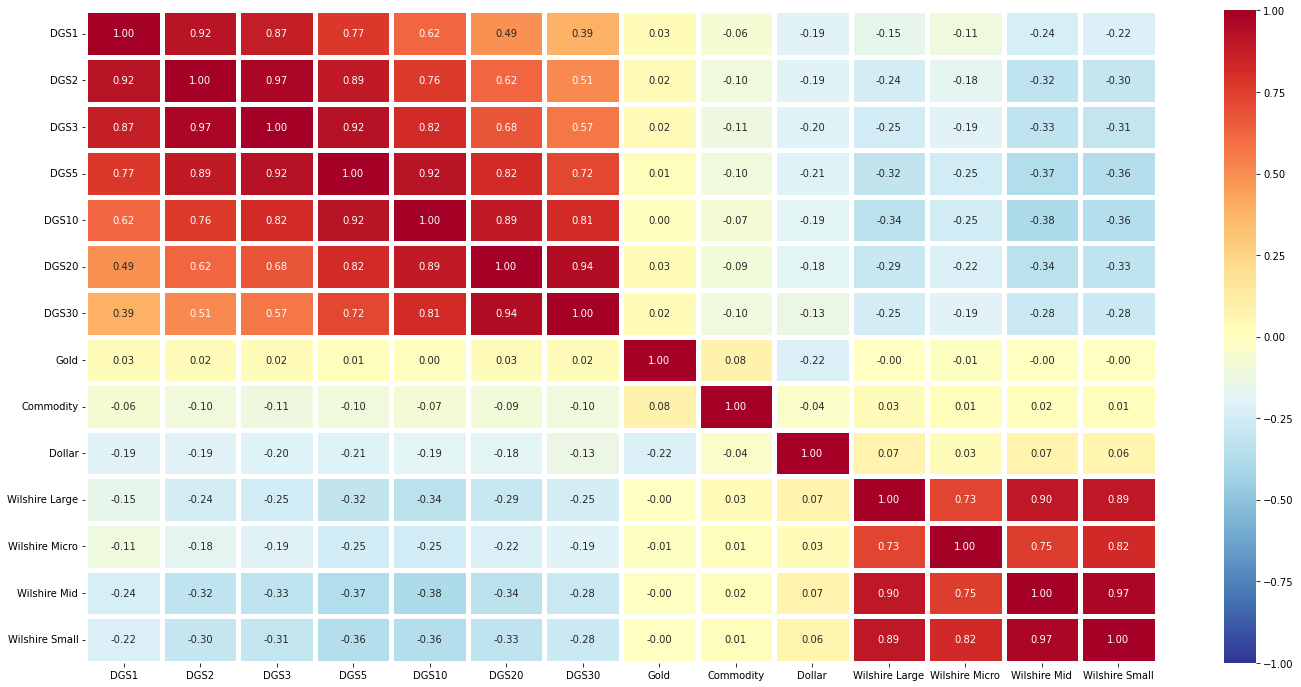

2001-04-21 00:00:00 ~ 2001-08-20 00:00:00


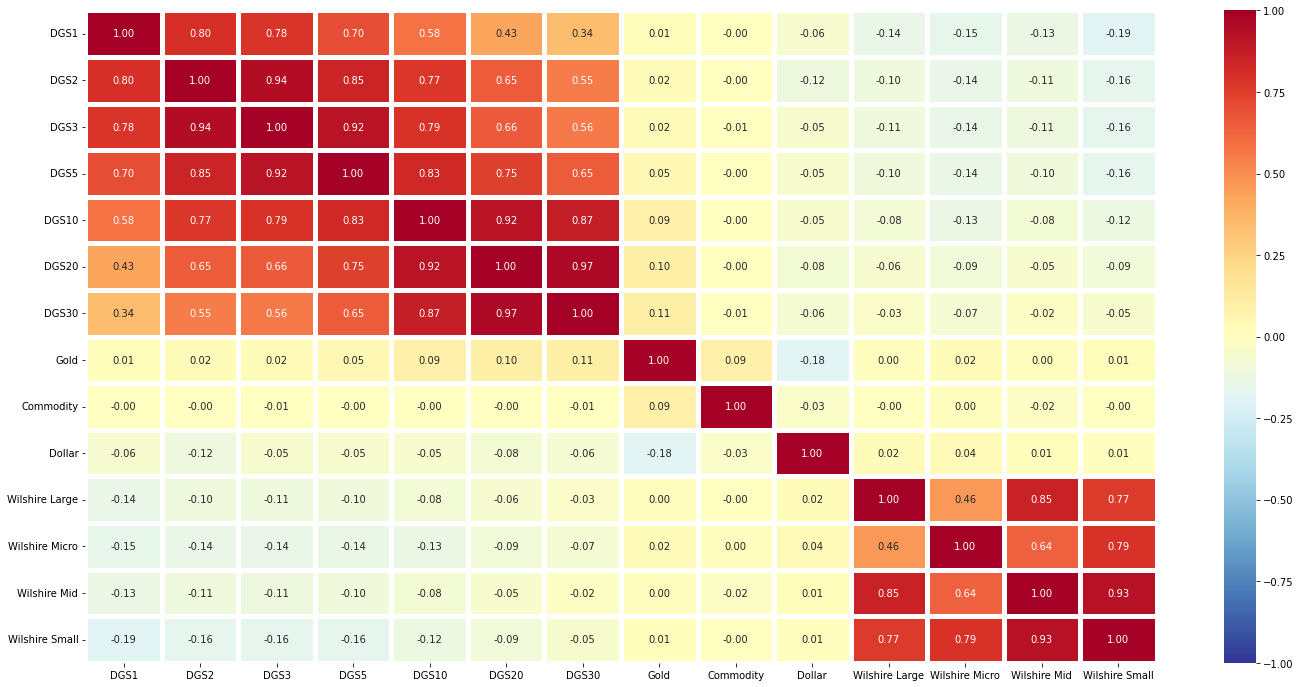

2001-08-18 00:00:00 ~ 2001-12-17 00:00:00


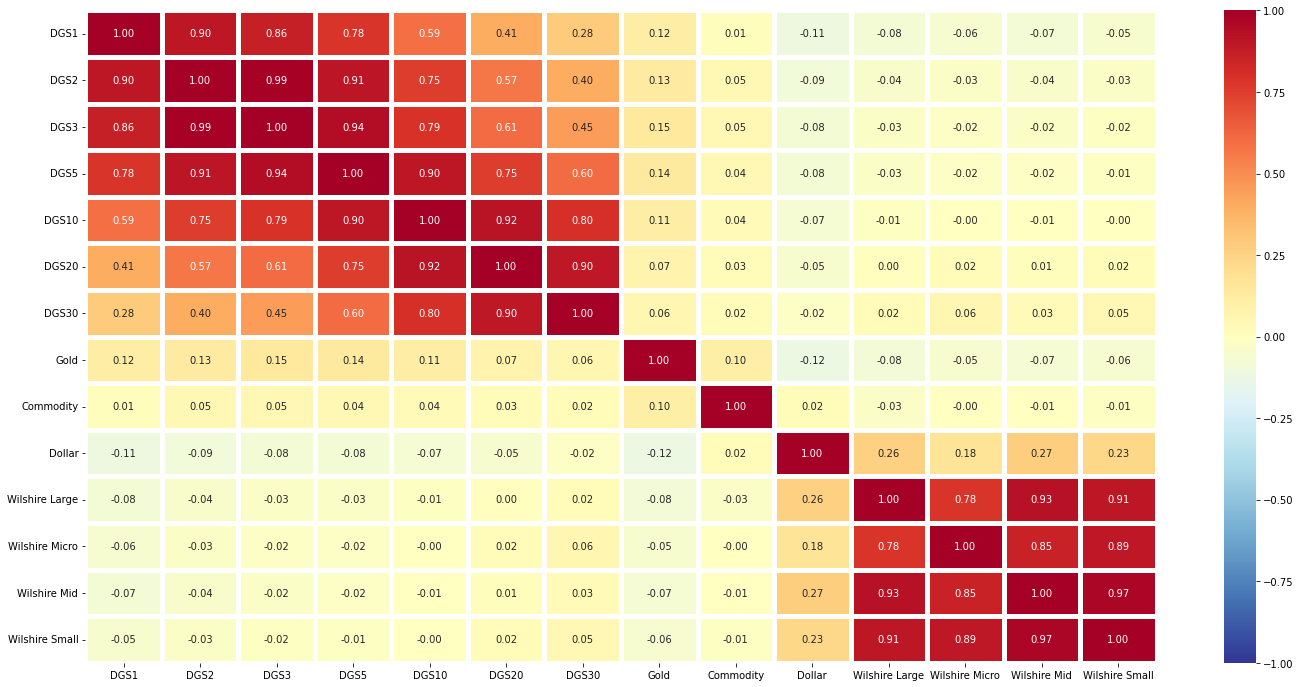

2001-12-15 00:00:00 ~ 2002-04-15 00:00:00


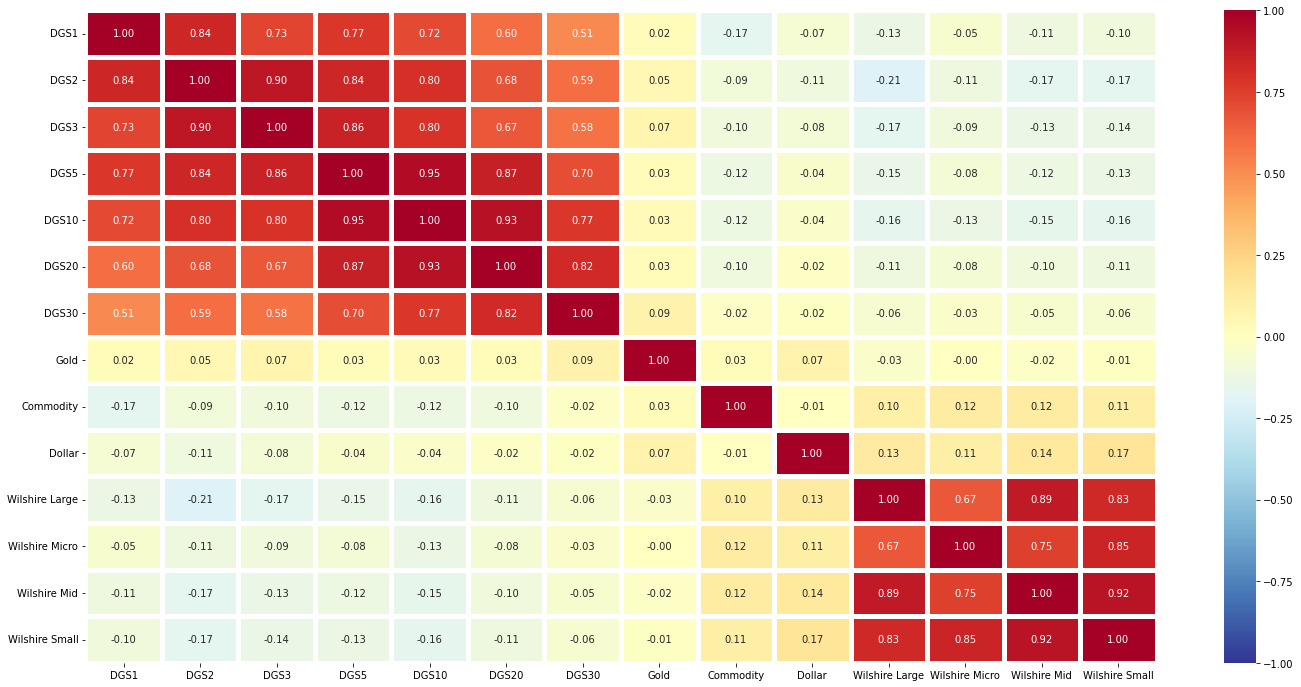

2002-04-13 00:00:00 ~ 2002-08-12 00:00:00


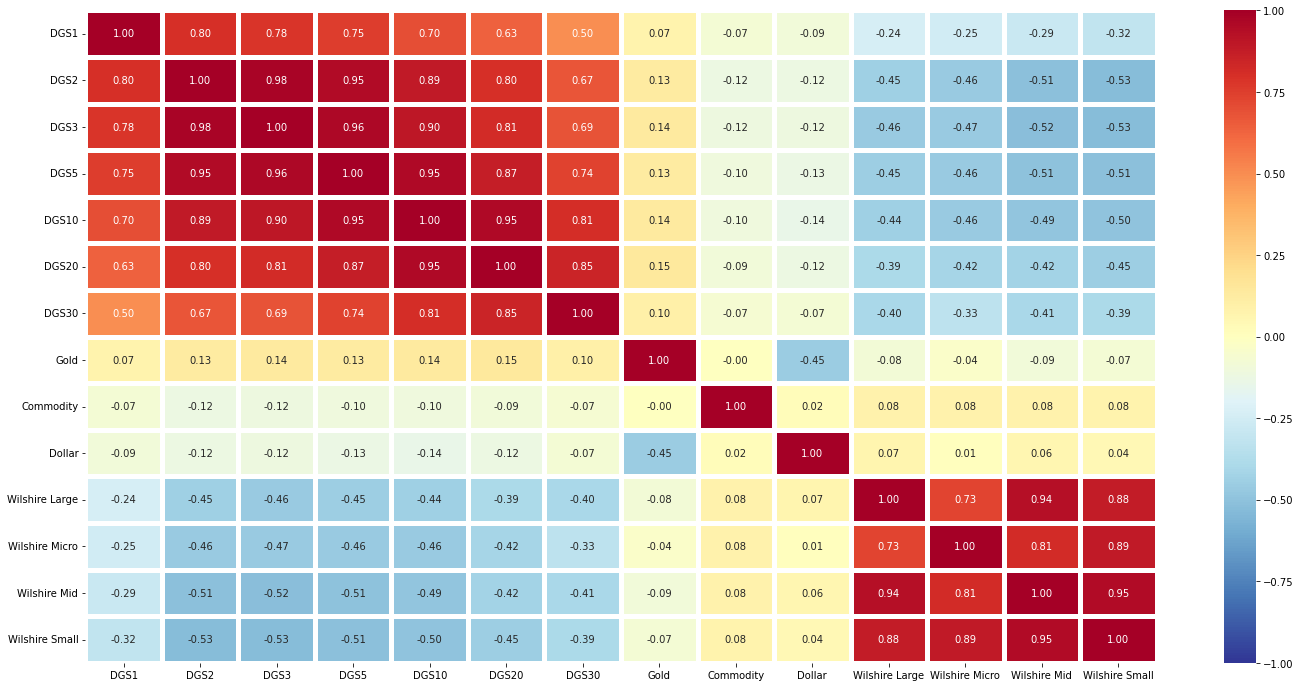

2002-08-10 00:00:00 ~ 2002-12-09 00:00:00


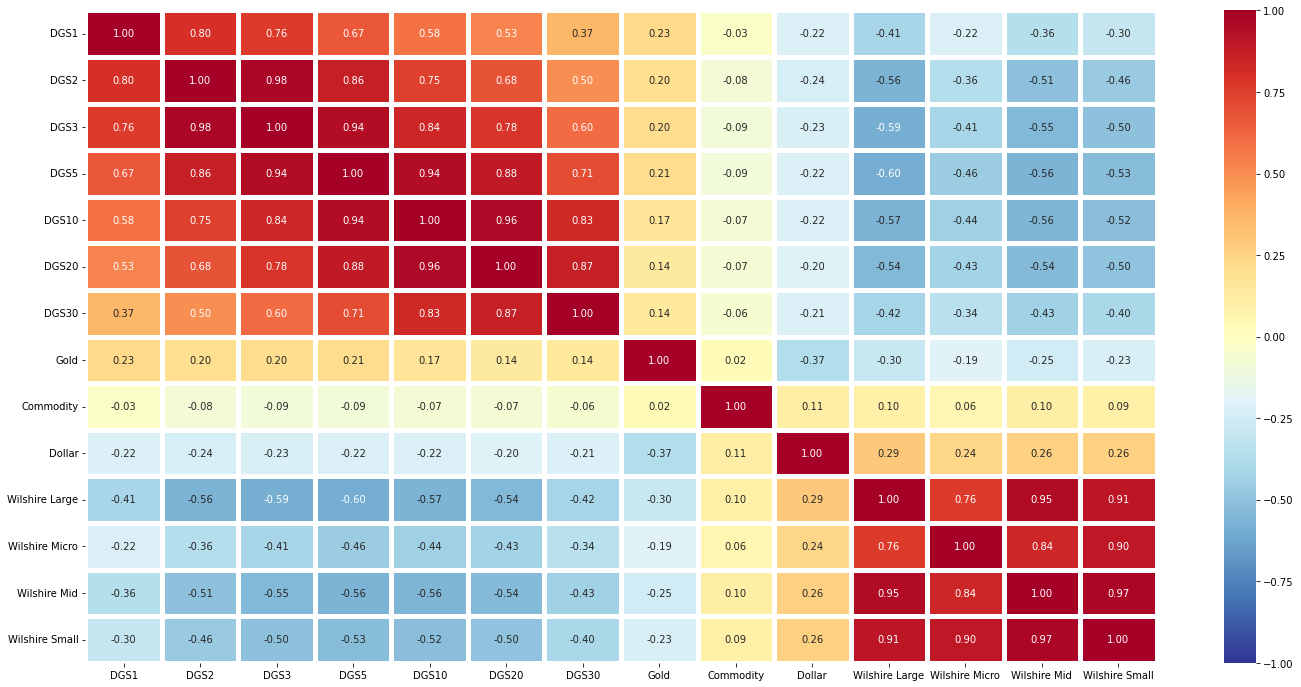

2002-12-07 00:00:00 ~ 2003-04-07 00:00:00


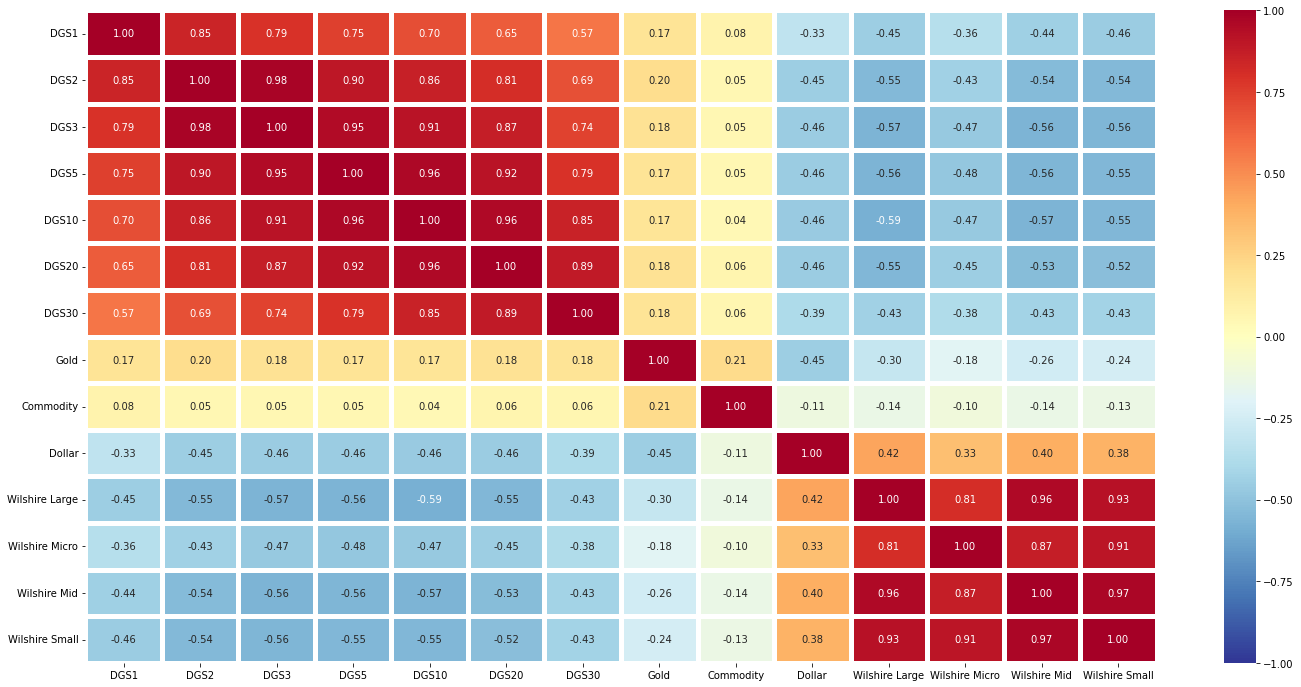

2003-04-05 00:00:00 ~ 2003-08-04 00:00:00


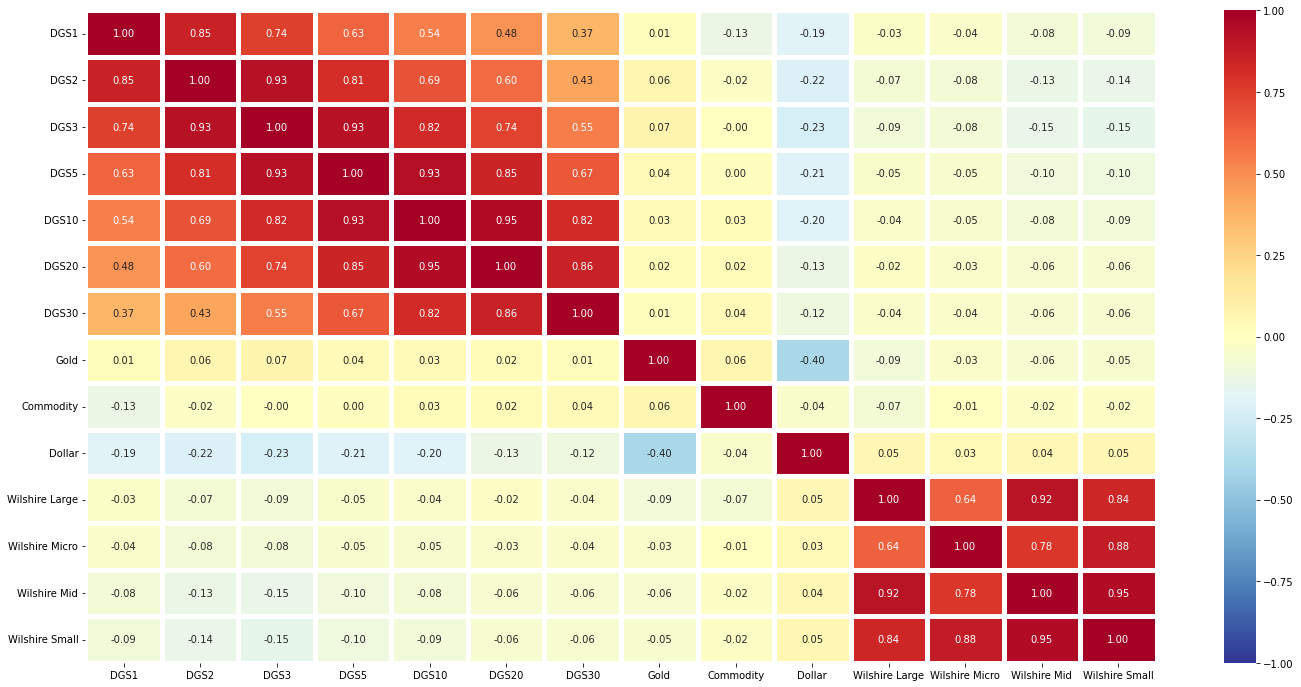

2003-08-02 00:00:00 ~ 2003-12-01 00:00:00


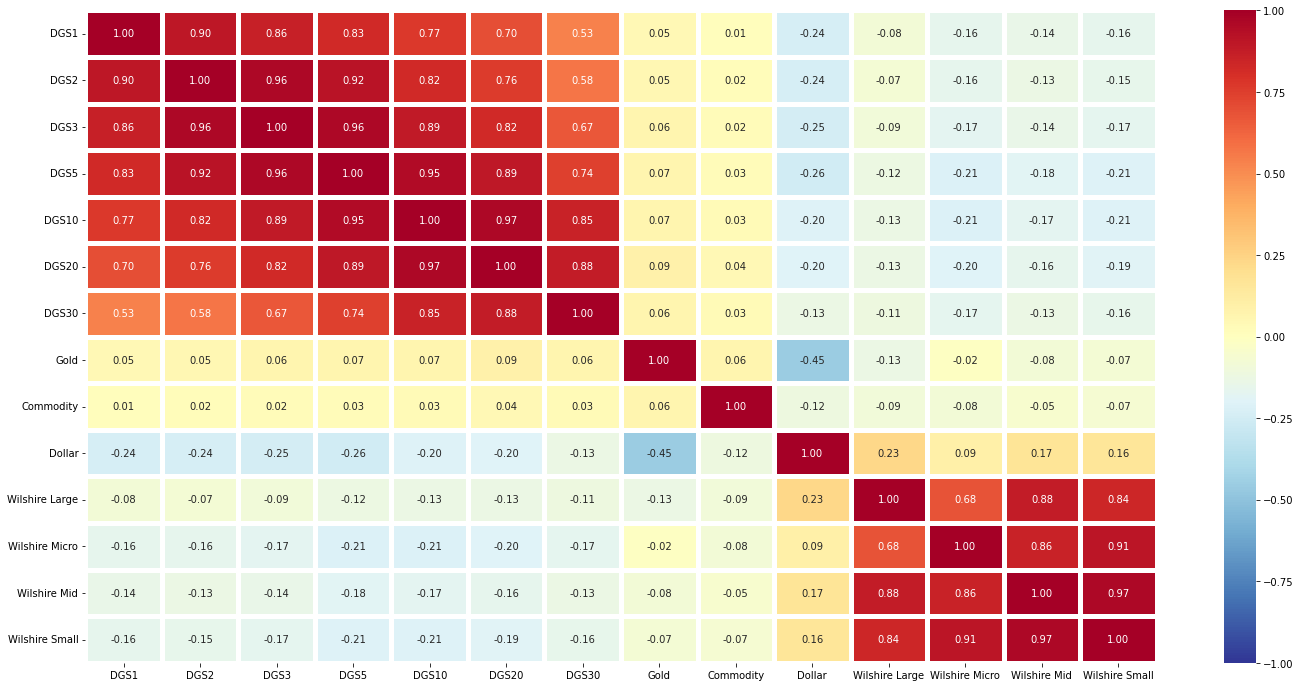

2003-11-29 00:00:00 ~ 2004-03-29 00:00:00


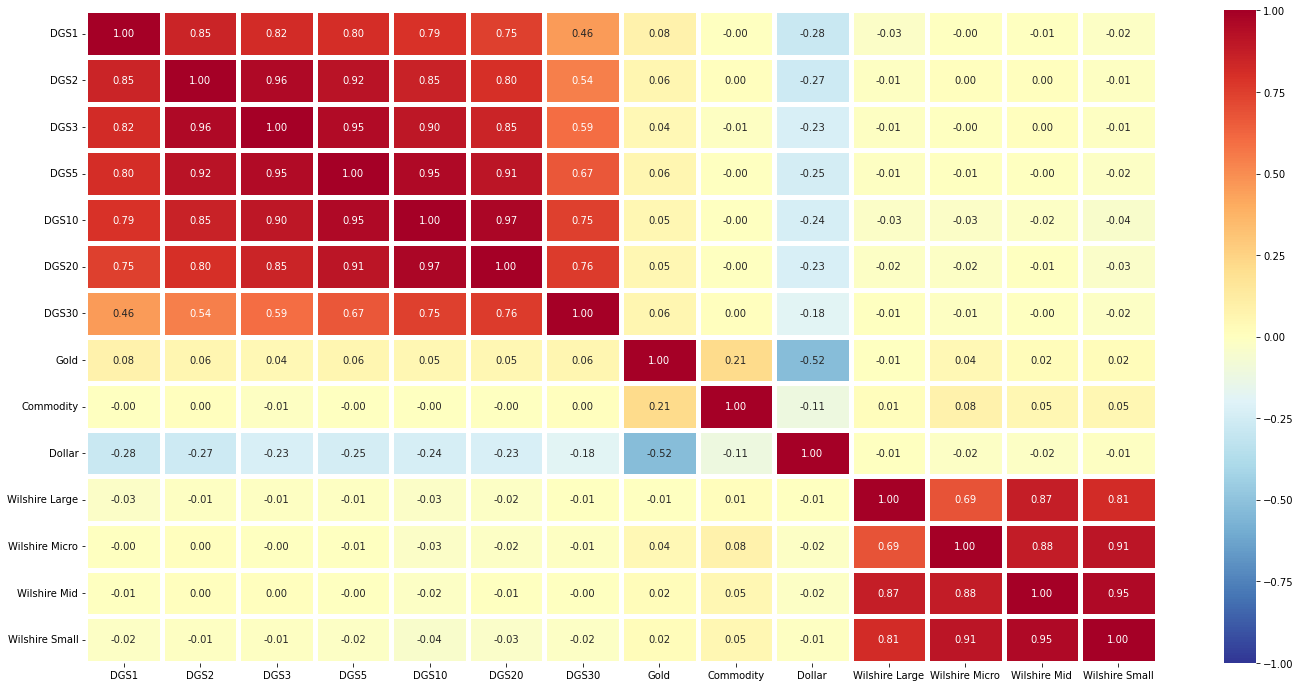

2004-03-27 00:00:00 ~ 2004-07-26 00:00:00


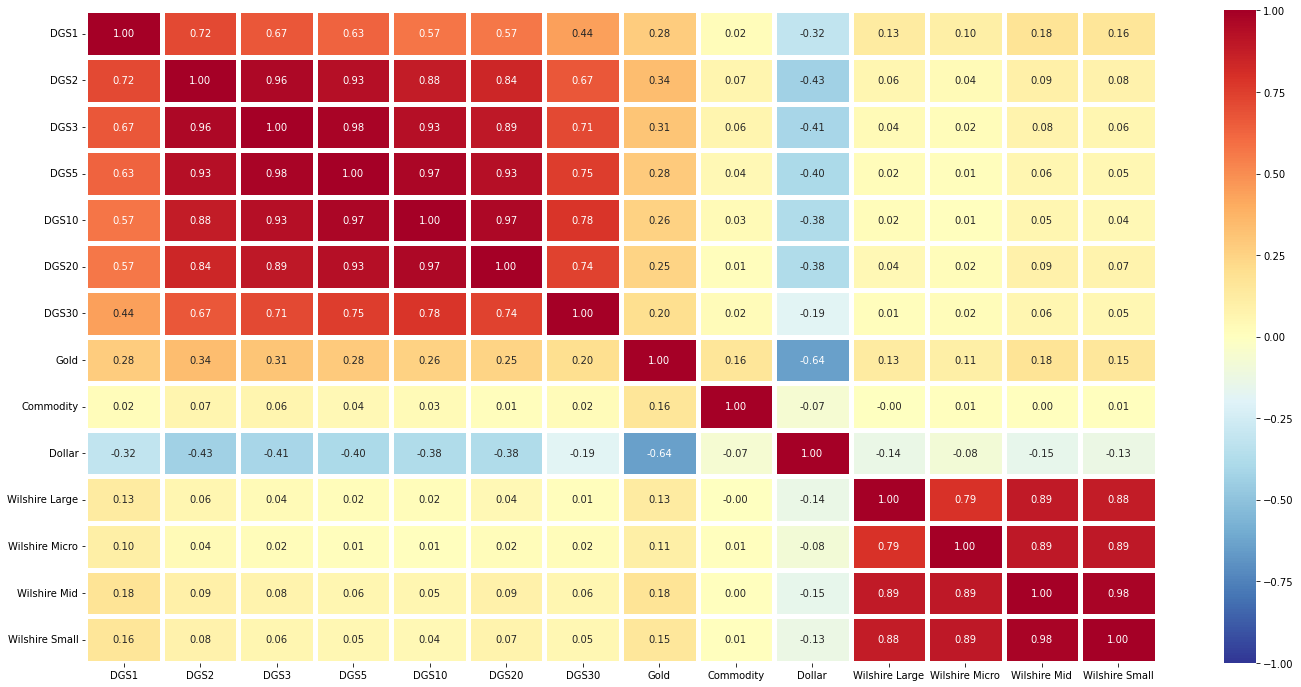

2004-07-24 00:00:00 ~ 2004-11-22 00:00:00


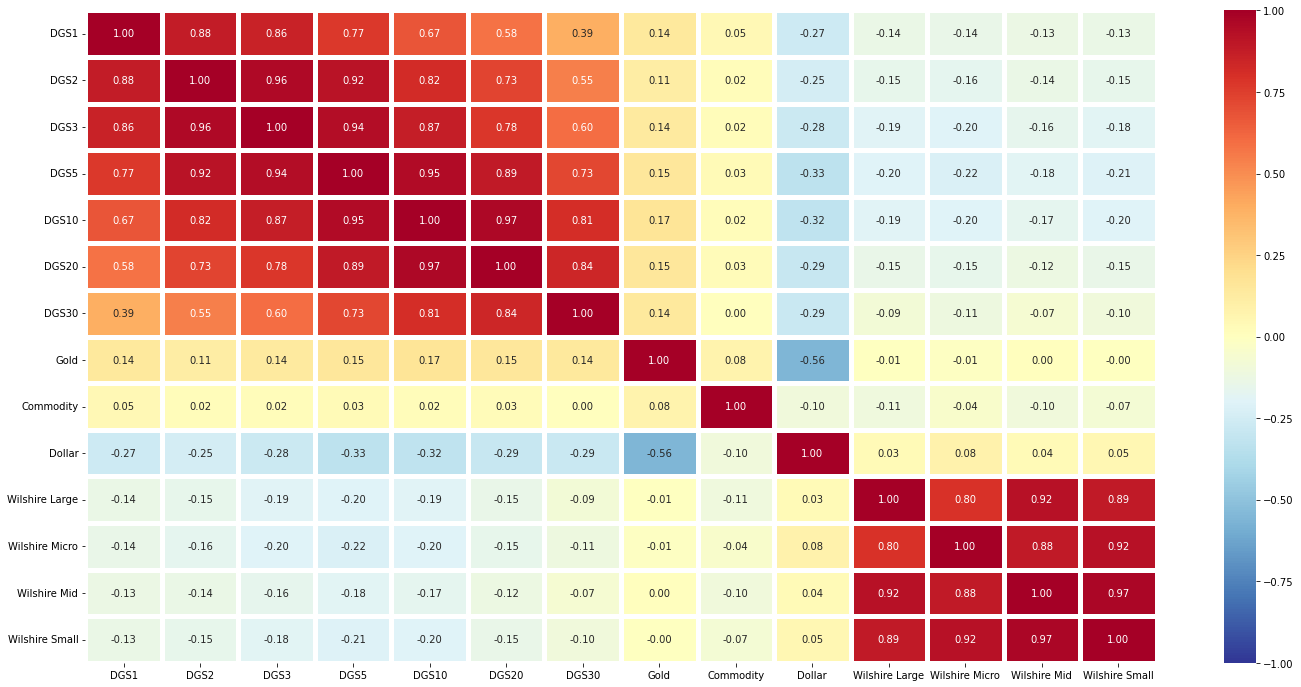

2004-11-20 00:00:00 ~ 2005-03-21 00:00:00


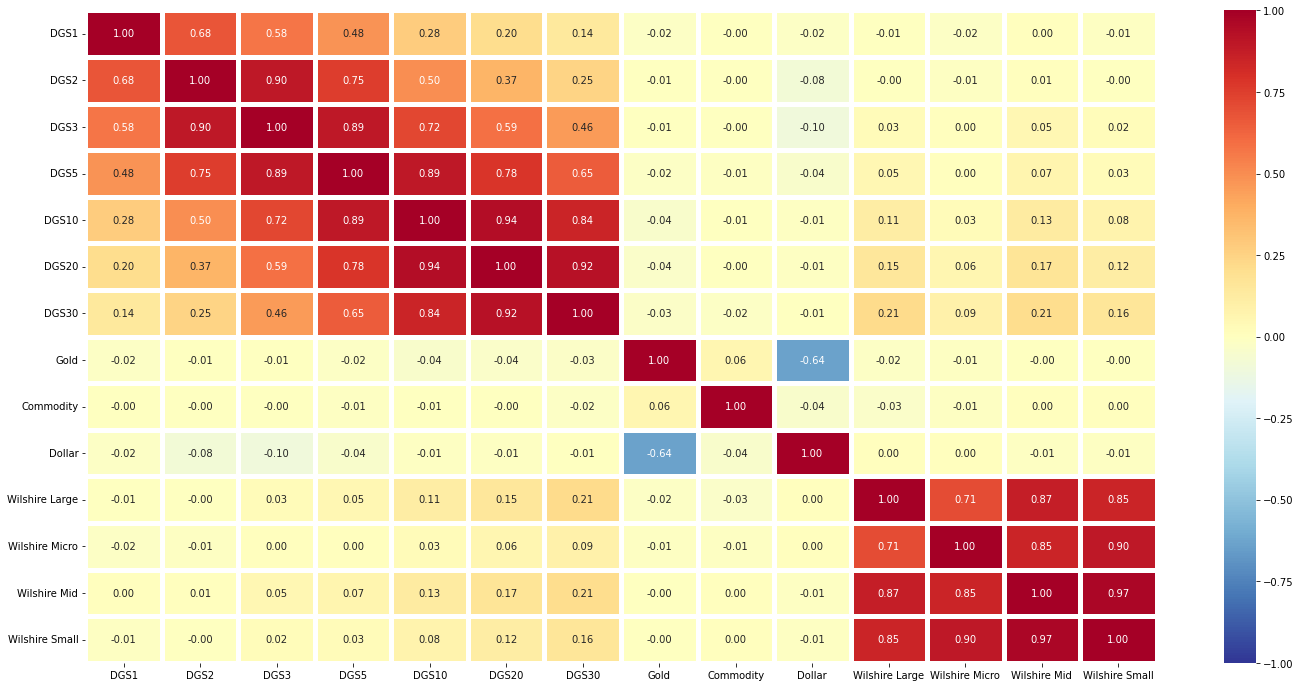

2005-03-19 00:00:00 ~ 2005-07-18 00:00:00


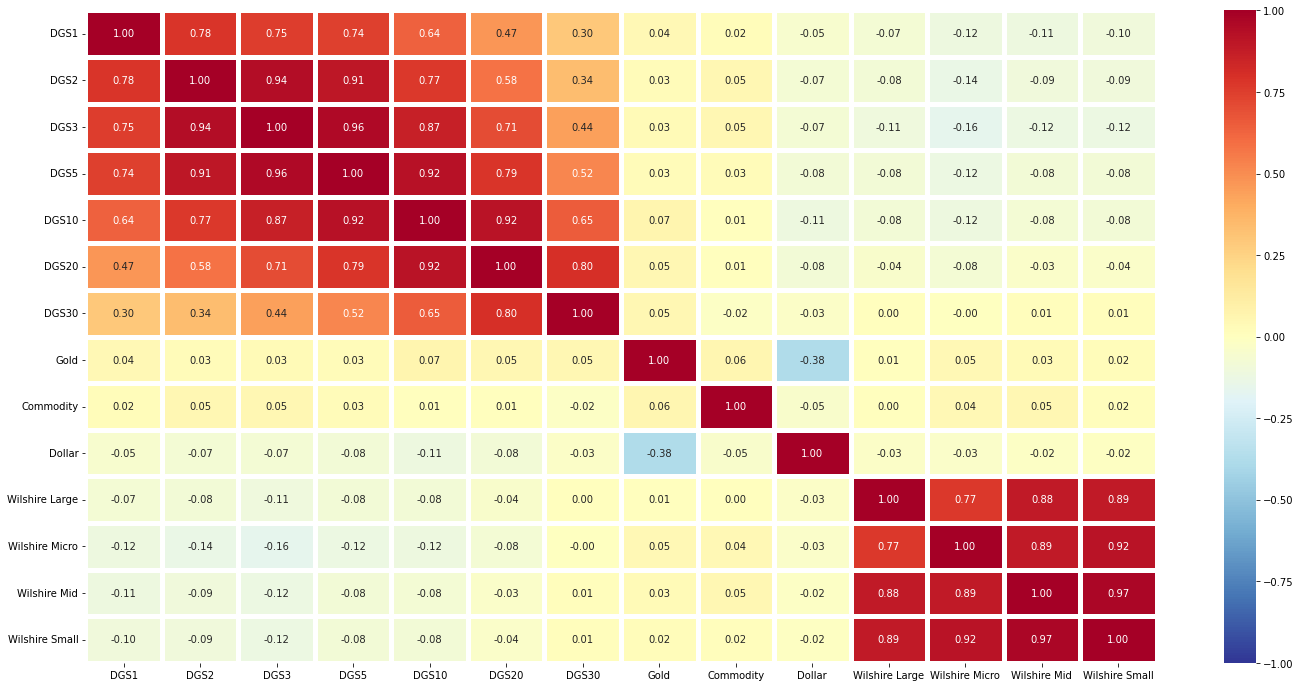

2005-07-16 00:00:00 ~ 2005-11-14 00:00:00


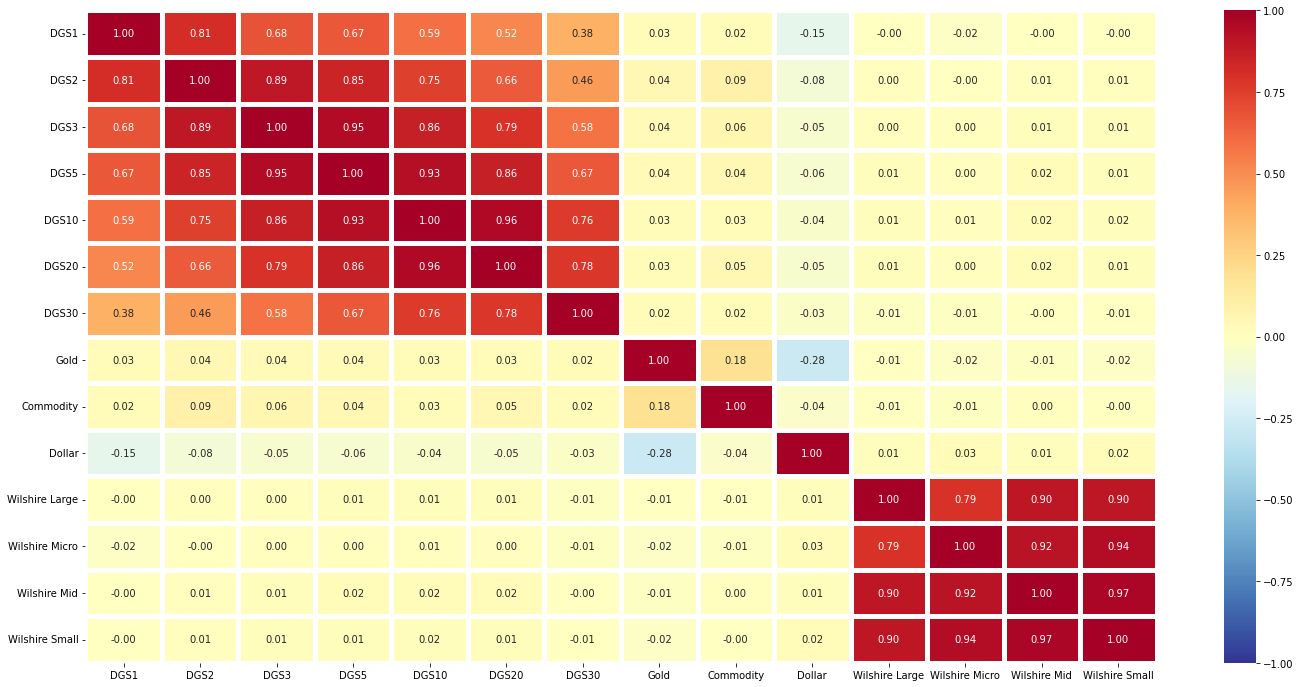

2005-11-12 00:00:00 ~ 2006-03-13 00:00:00


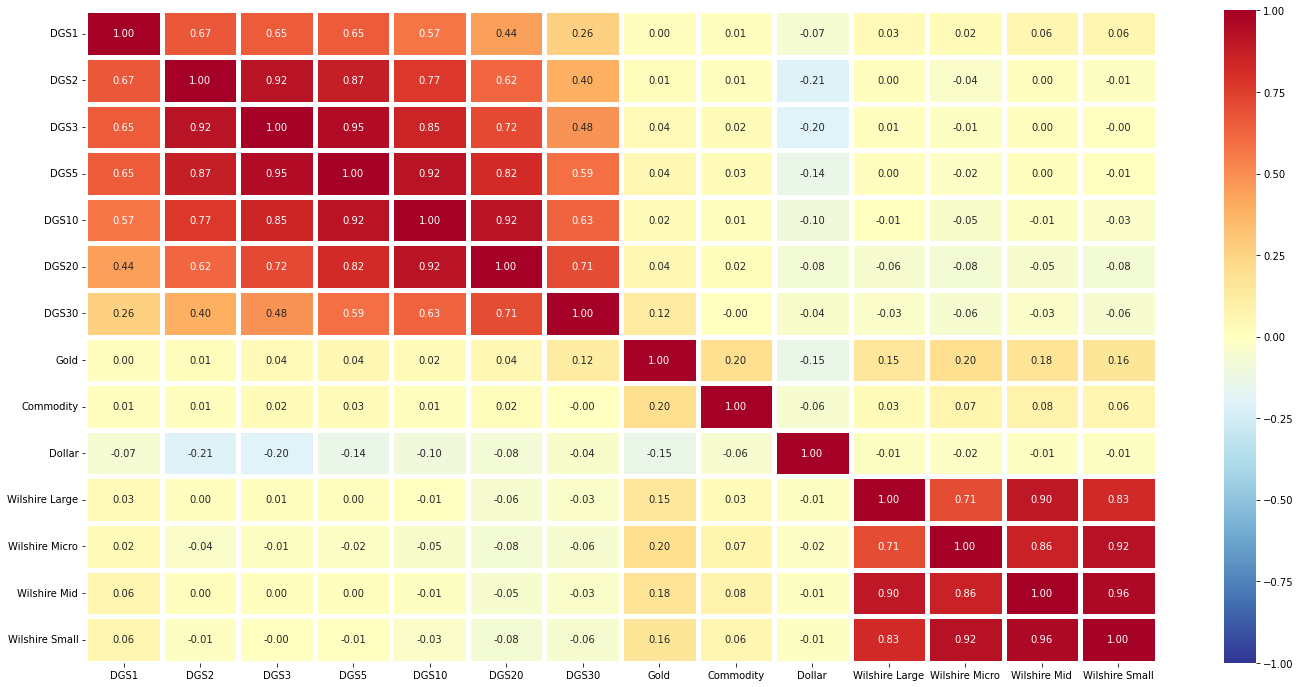

2006-03-11 00:00:00 ~ 2006-07-10 00:00:00


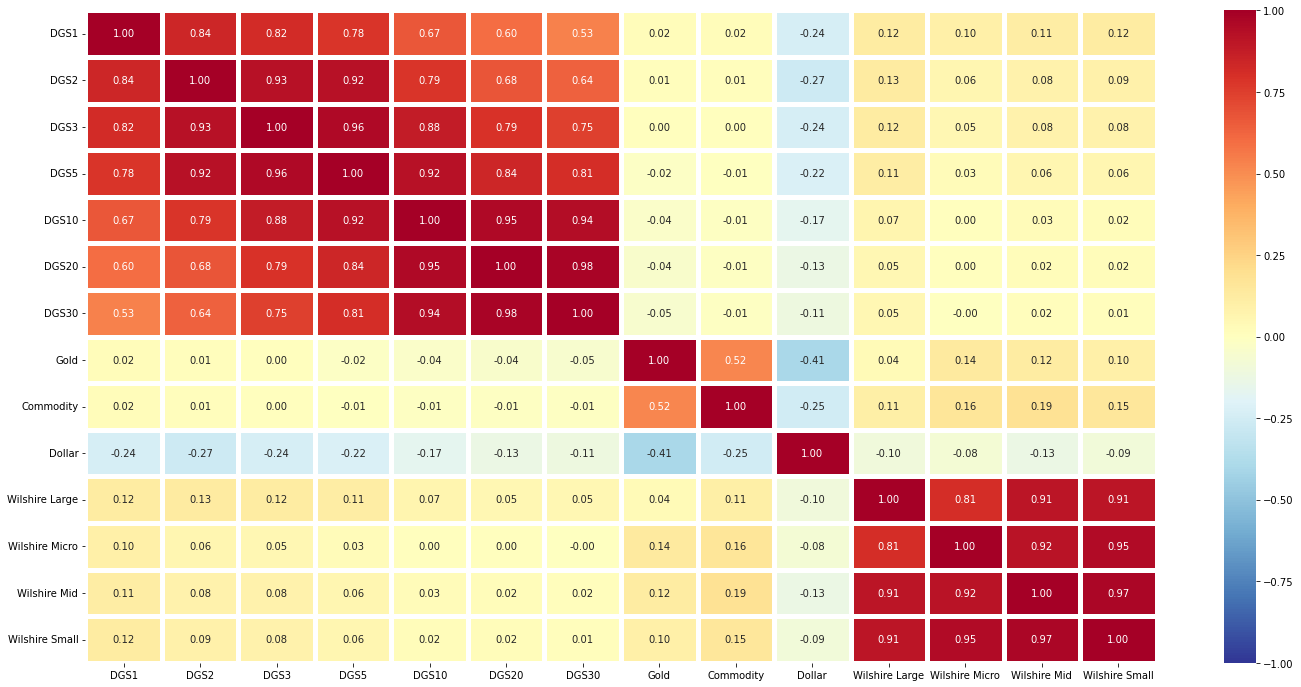

2006-07-08 00:00:00 ~ 2006-11-06 00:00:00


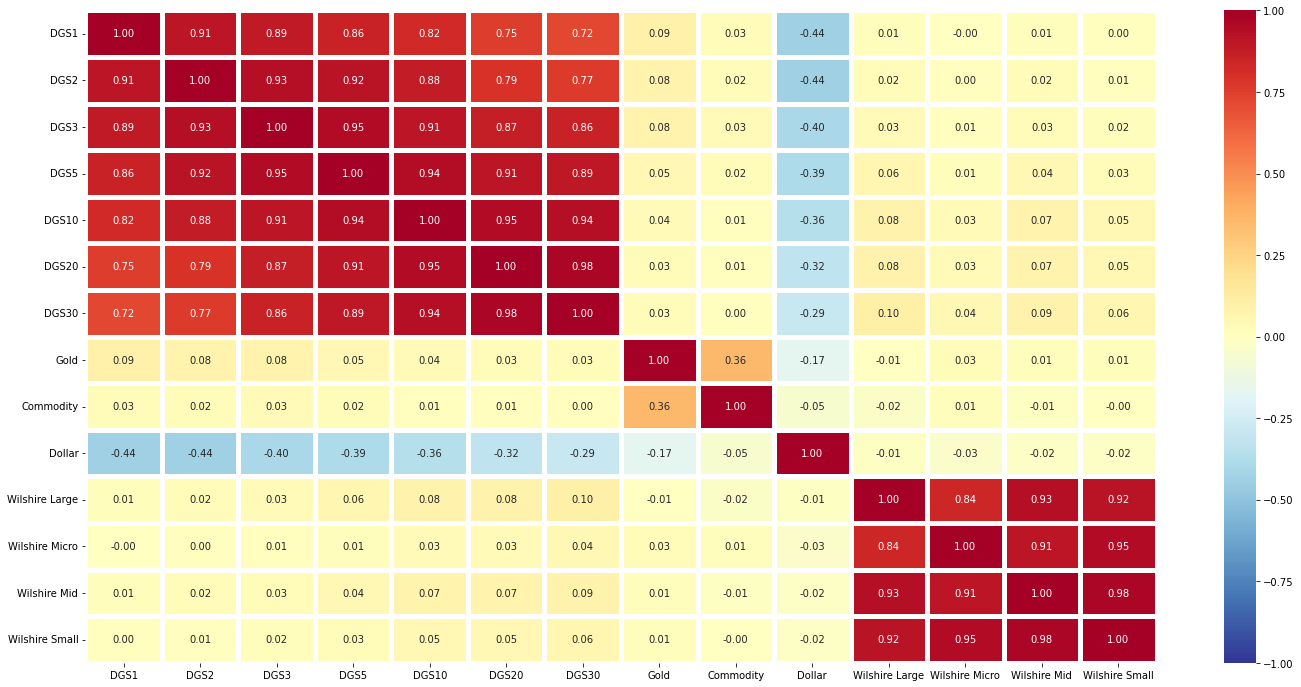

2006-11-04 00:00:00 ~ 2007-03-05 00:00:00


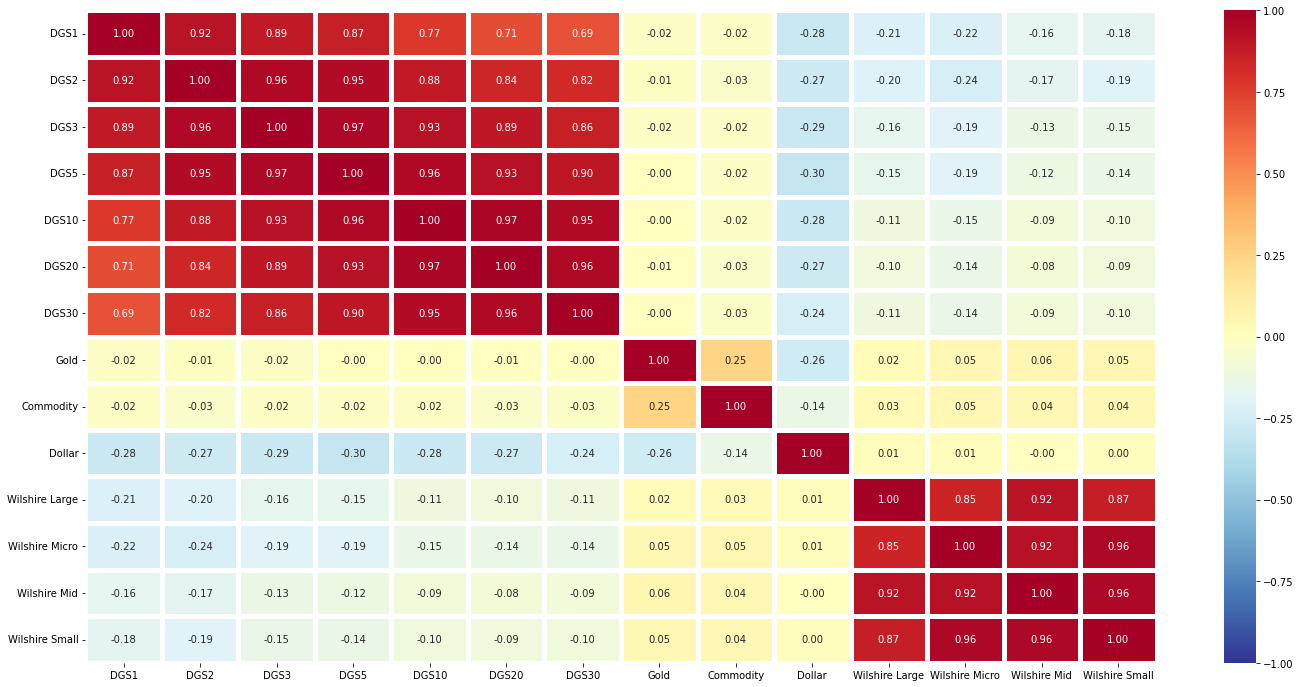

2007-03-03 00:00:00 ~ 2007-07-02 00:00:00


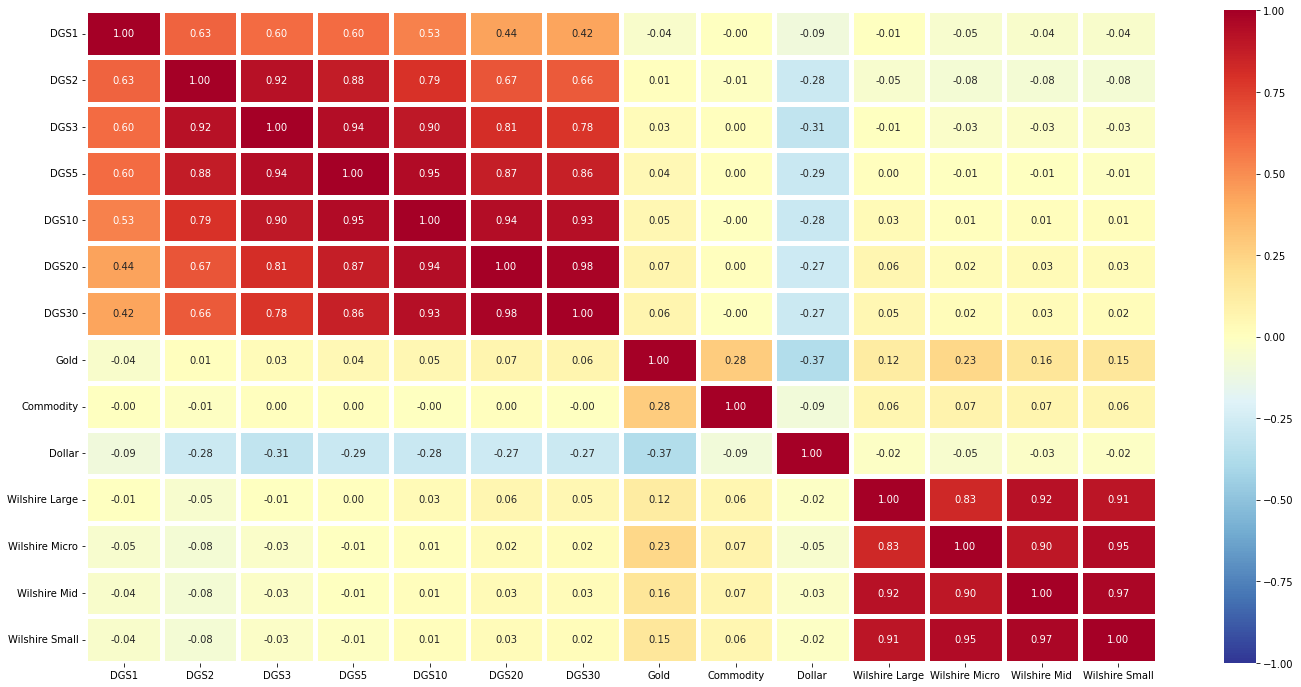

2007-06-30 00:00:00 ~ 2007-10-29 00:00:00


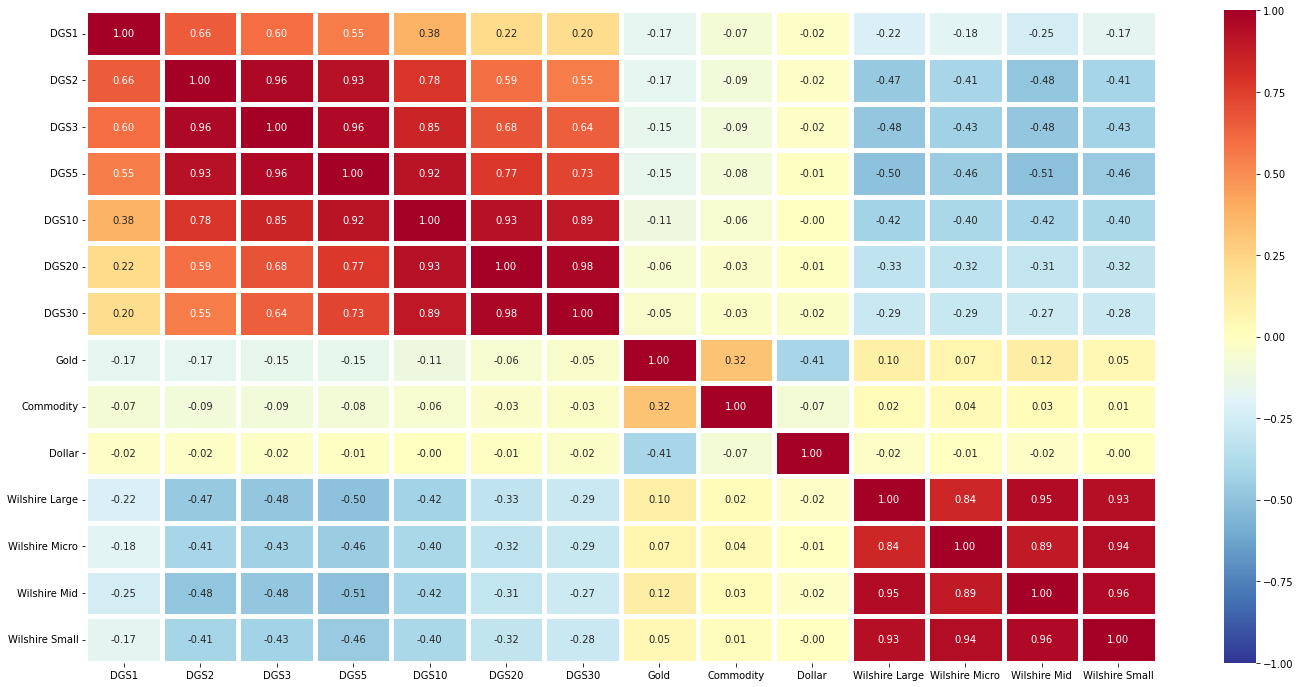

2007-10-27 00:00:00 ~ 2008-02-25 00:00:00


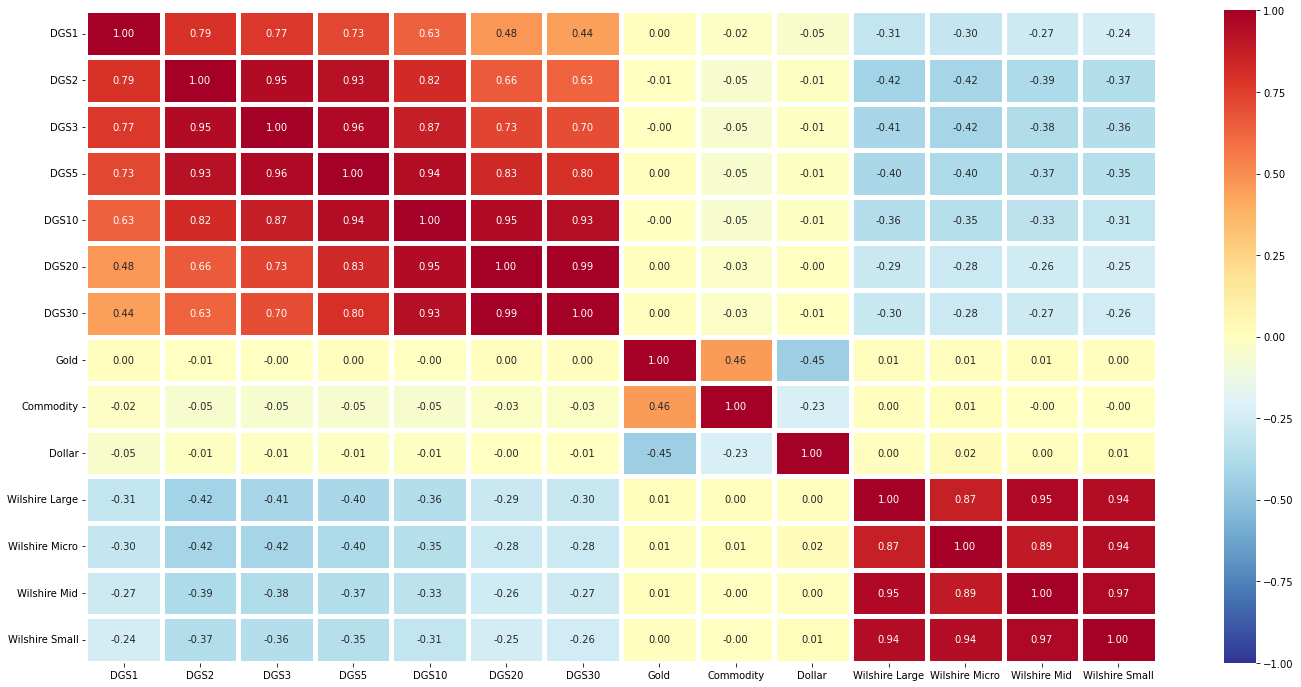

2008-02-23 00:00:00 ~ 2008-06-23 00:00:00


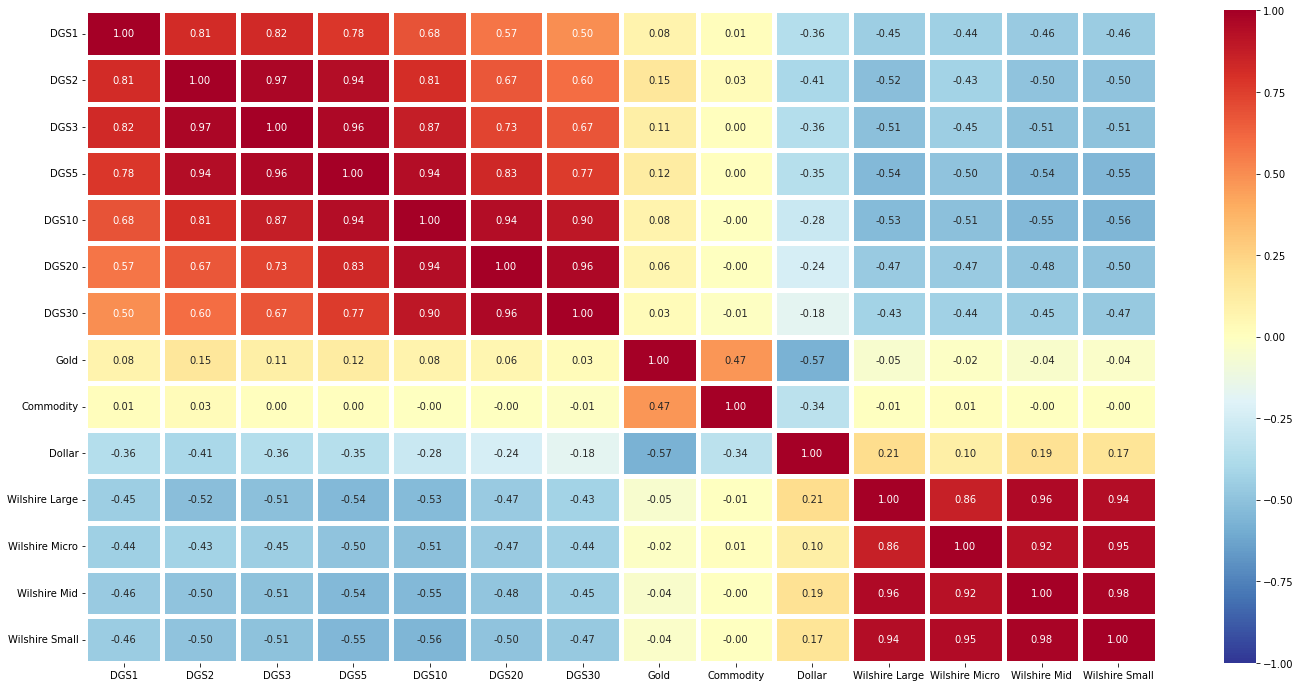

2008-06-21 00:00:00 ~ 2008-10-20 00:00:00


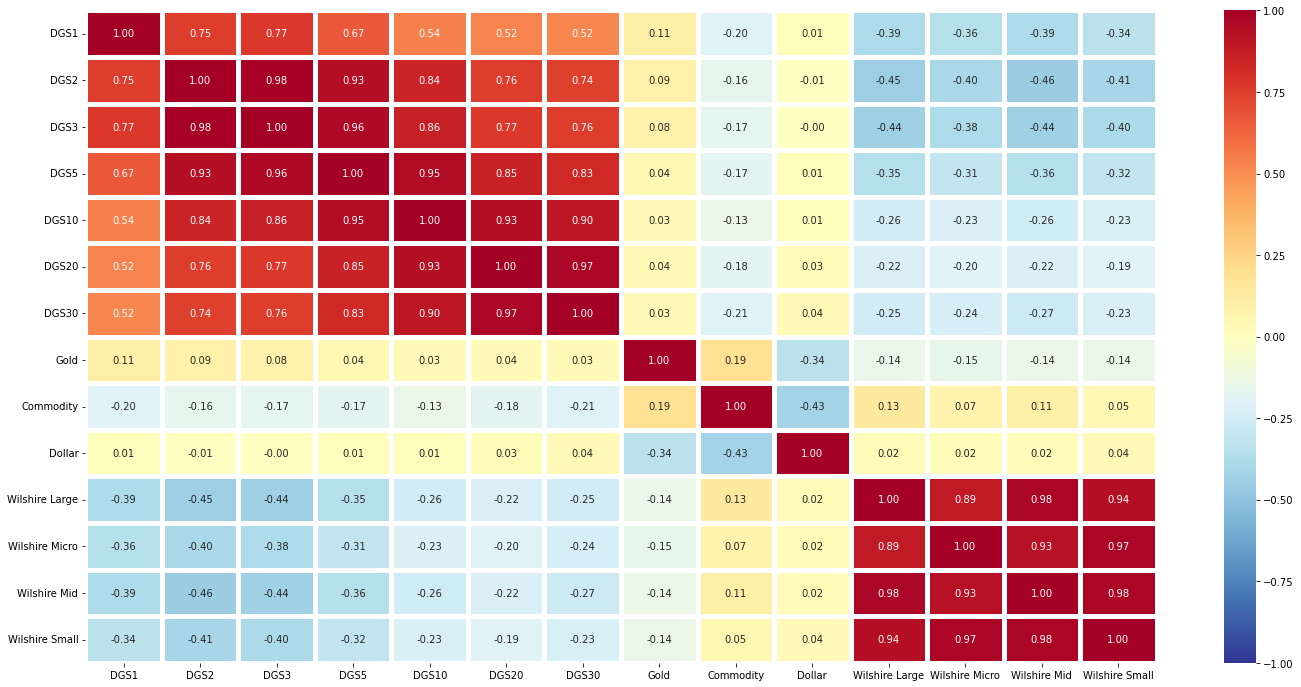

2008-10-18 00:00:00 ~ 2009-02-16 00:00:00


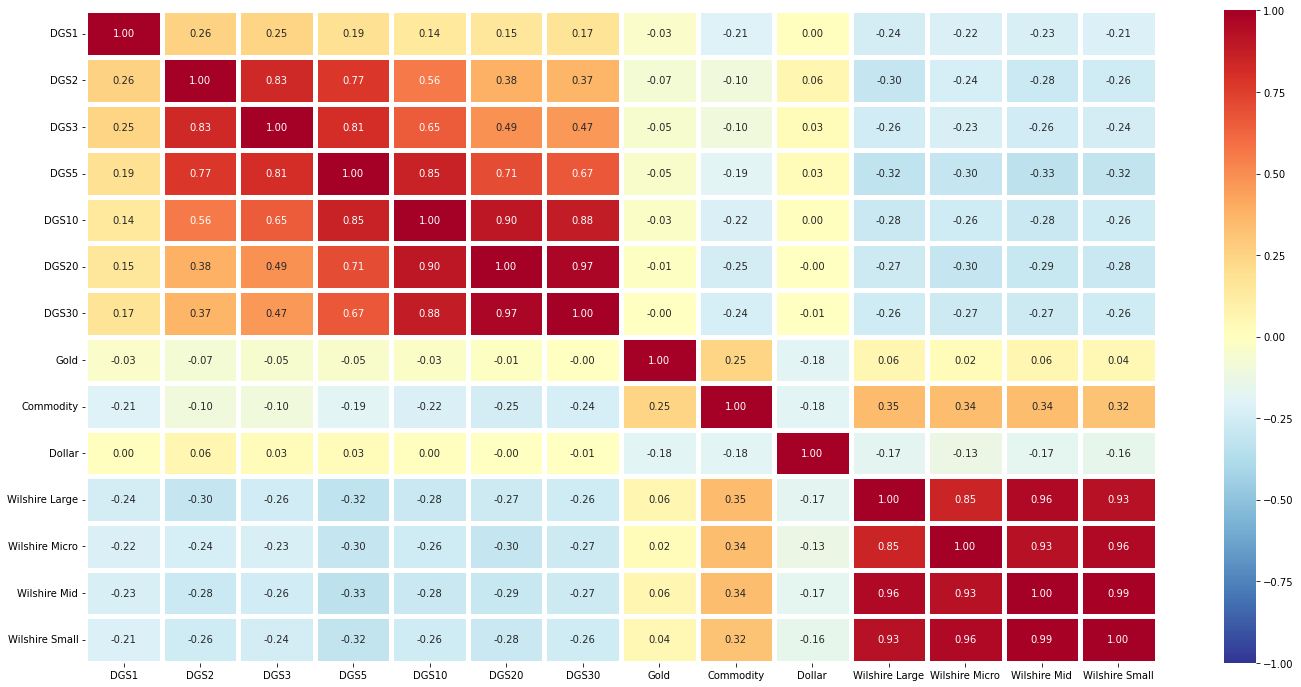

2009-02-14 00:00:00 ~ 2009-06-15 00:00:00


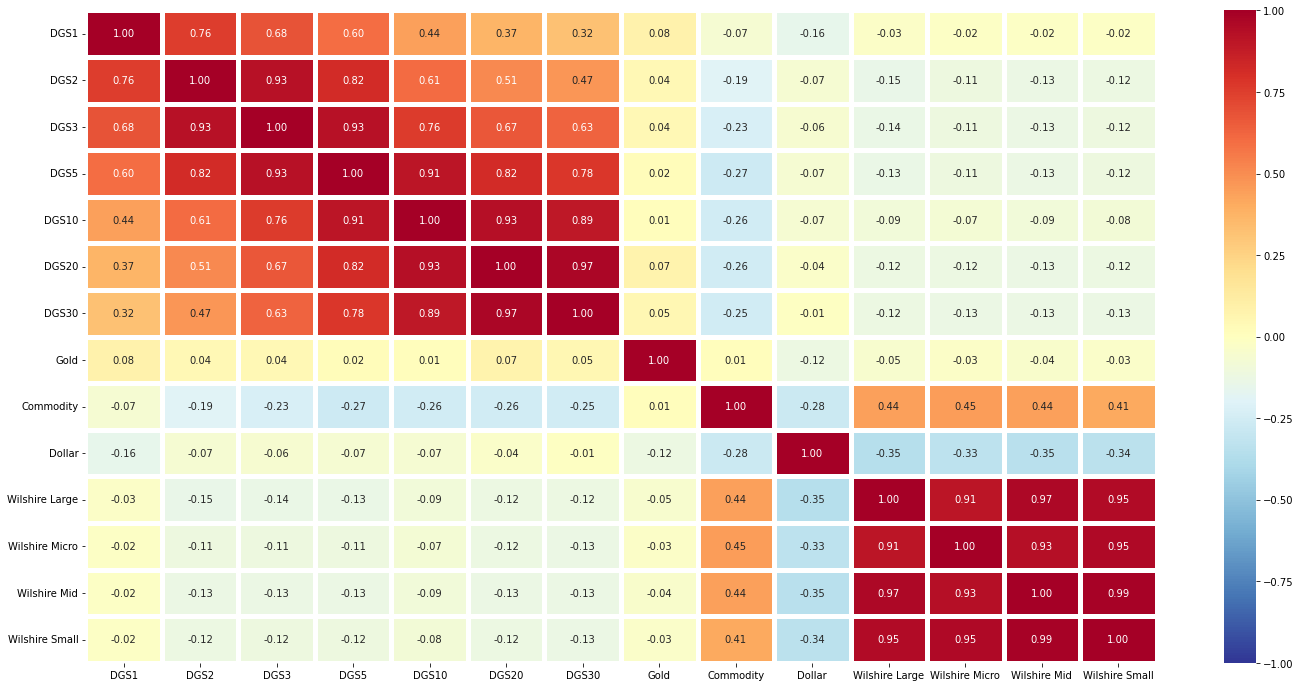

2009-06-13 00:00:00 ~ 2009-10-12 00:00:00


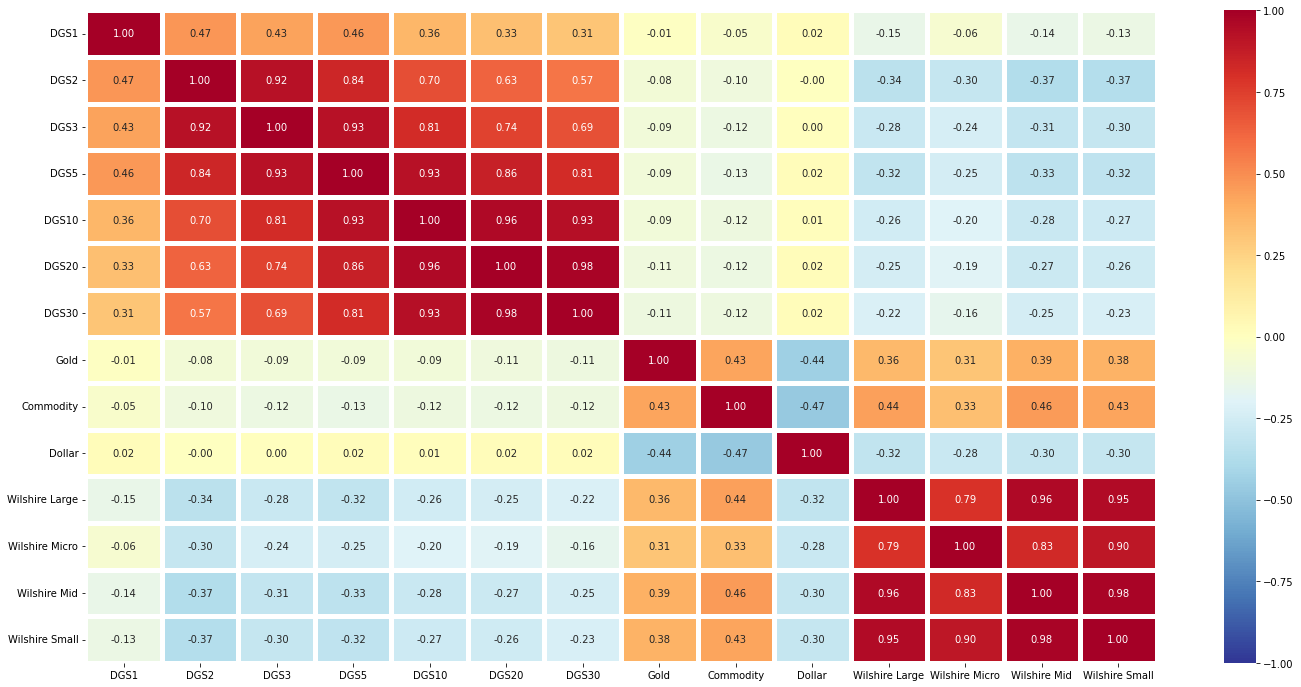

2009-10-10 00:00:00 ~ 2010-02-08 00:00:00


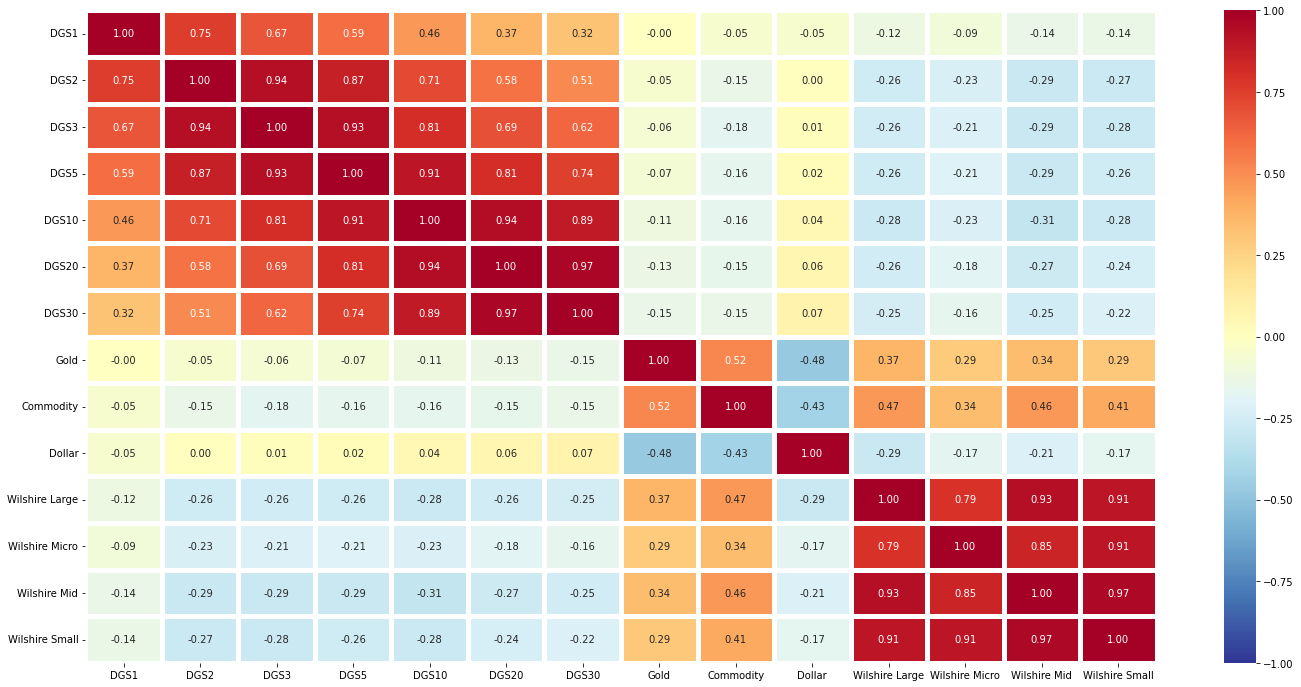

2010-02-06 00:00:00 ~ 2010-06-07 00:00:00


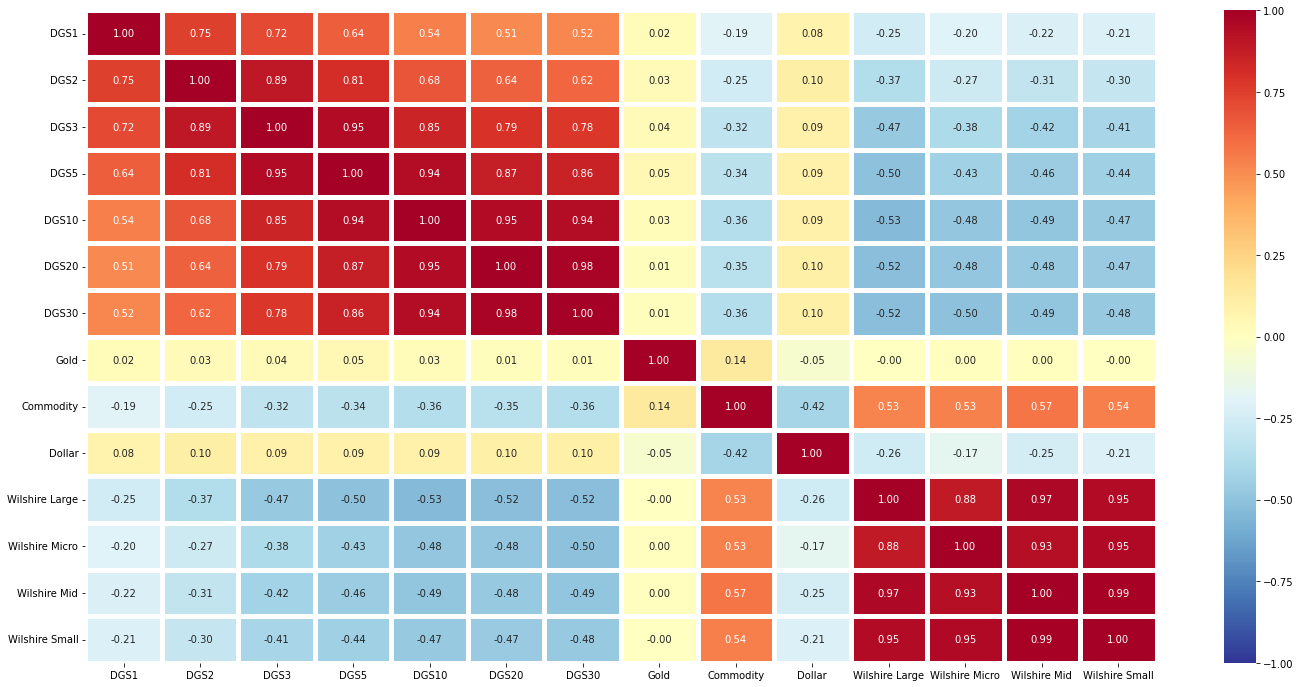

2010-06-05 00:00:00 ~ 2010-10-04 00:00:00


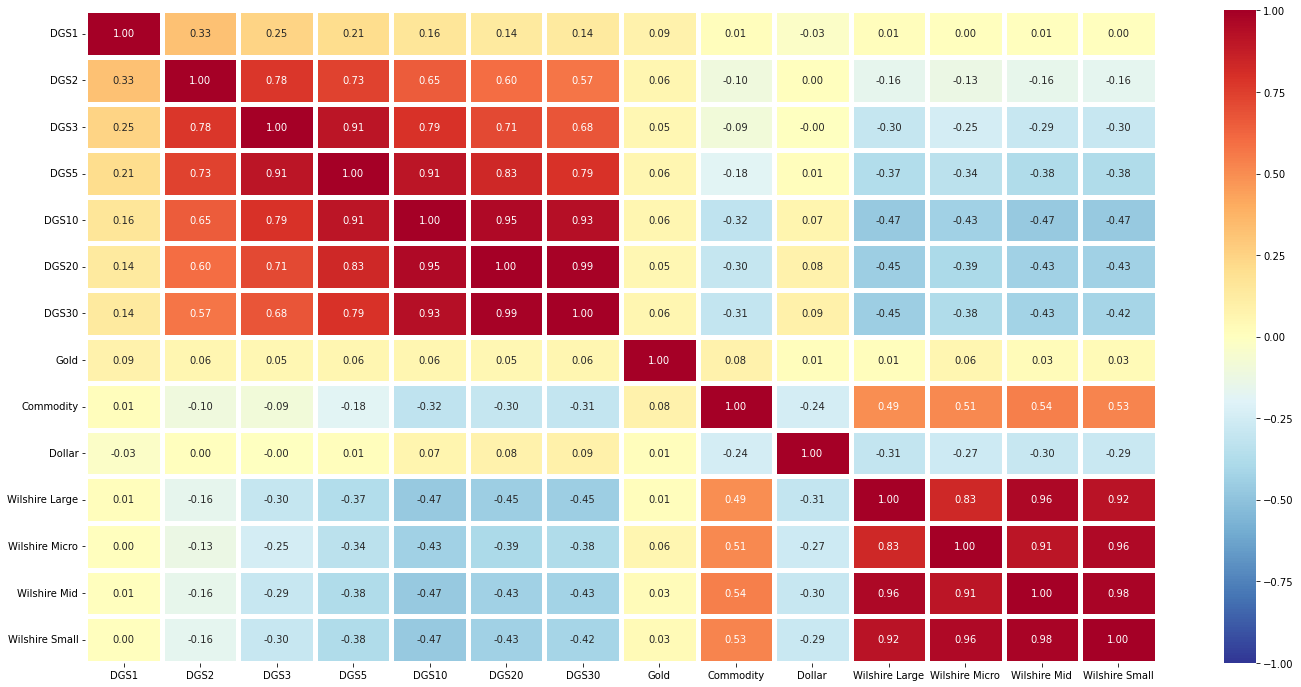

2010-10-02 00:00:00 ~ 2011-01-31 00:00:00


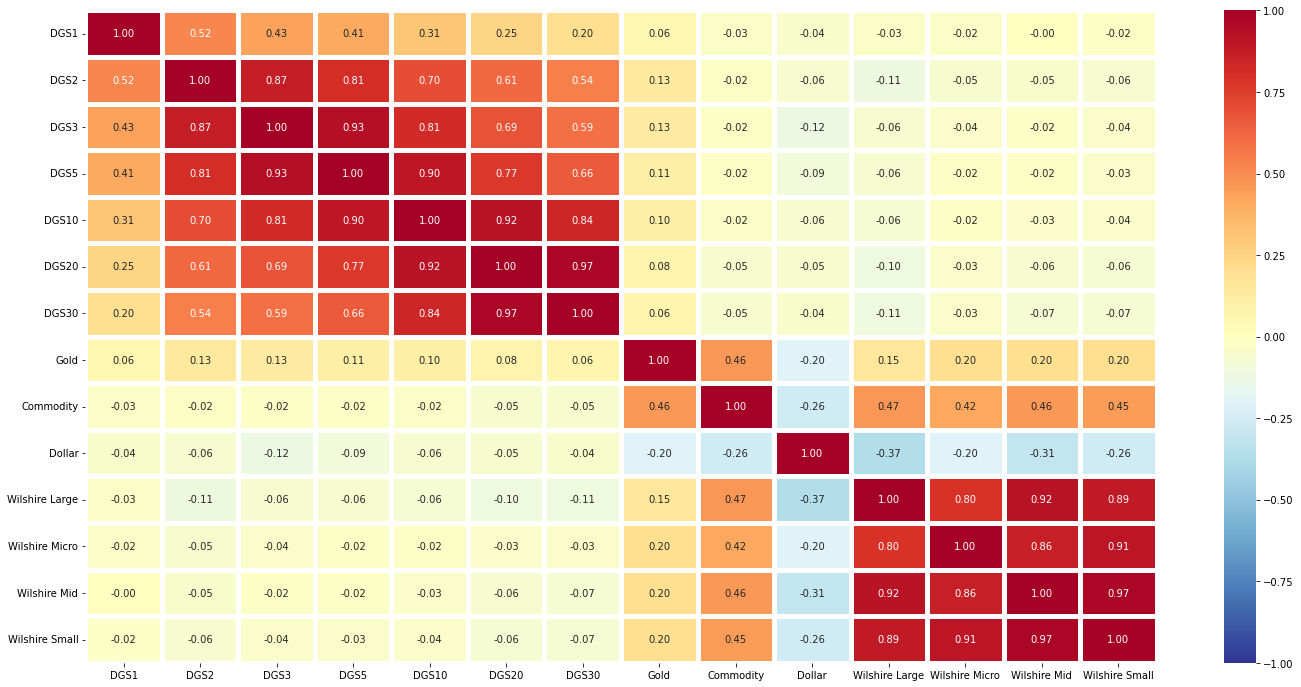

2011-01-29 00:00:00 ~ 2011-05-30 00:00:00


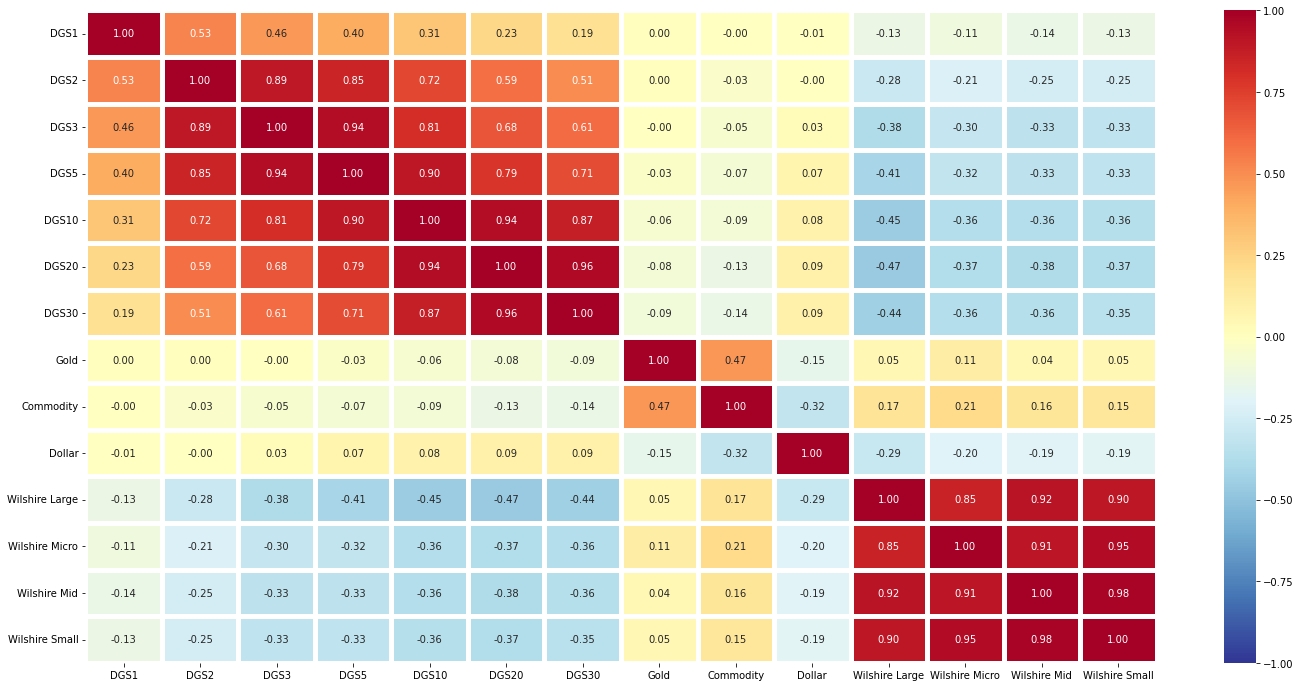

2011-05-28 00:00:00 ~ 2011-09-26 00:00:00


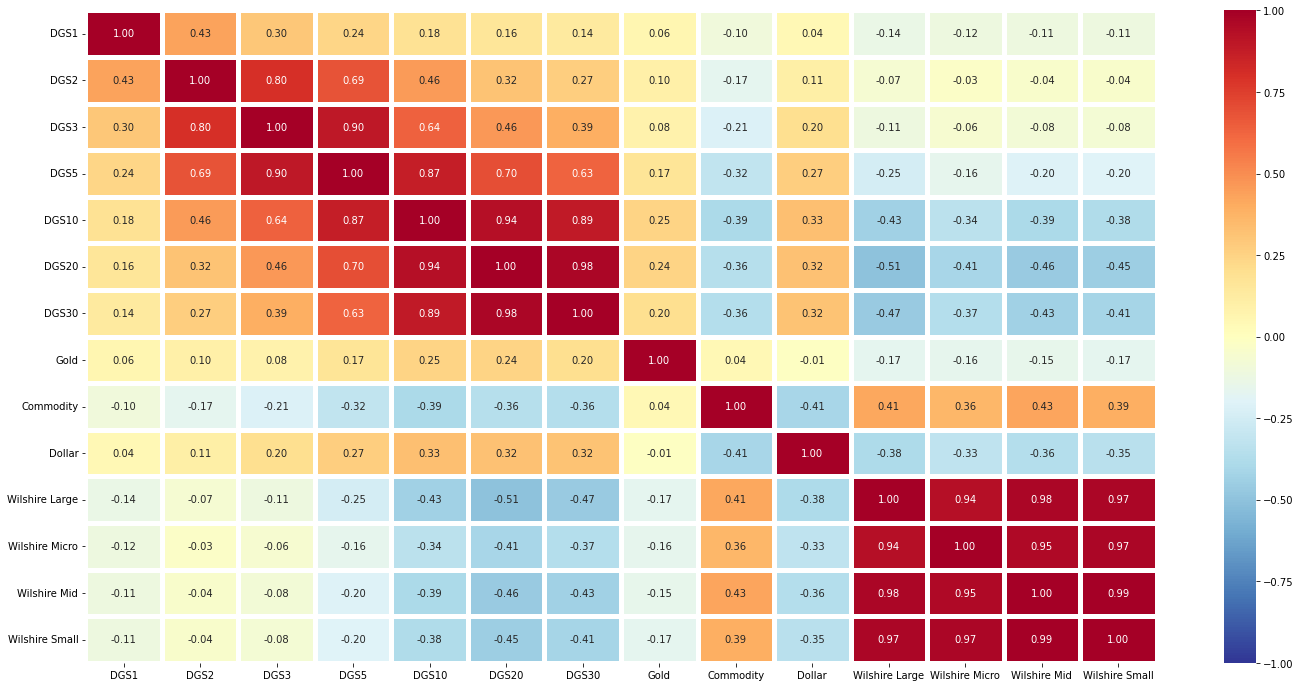

2011-09-24 00:00:00 ~ 2012-01-23 00:00:00


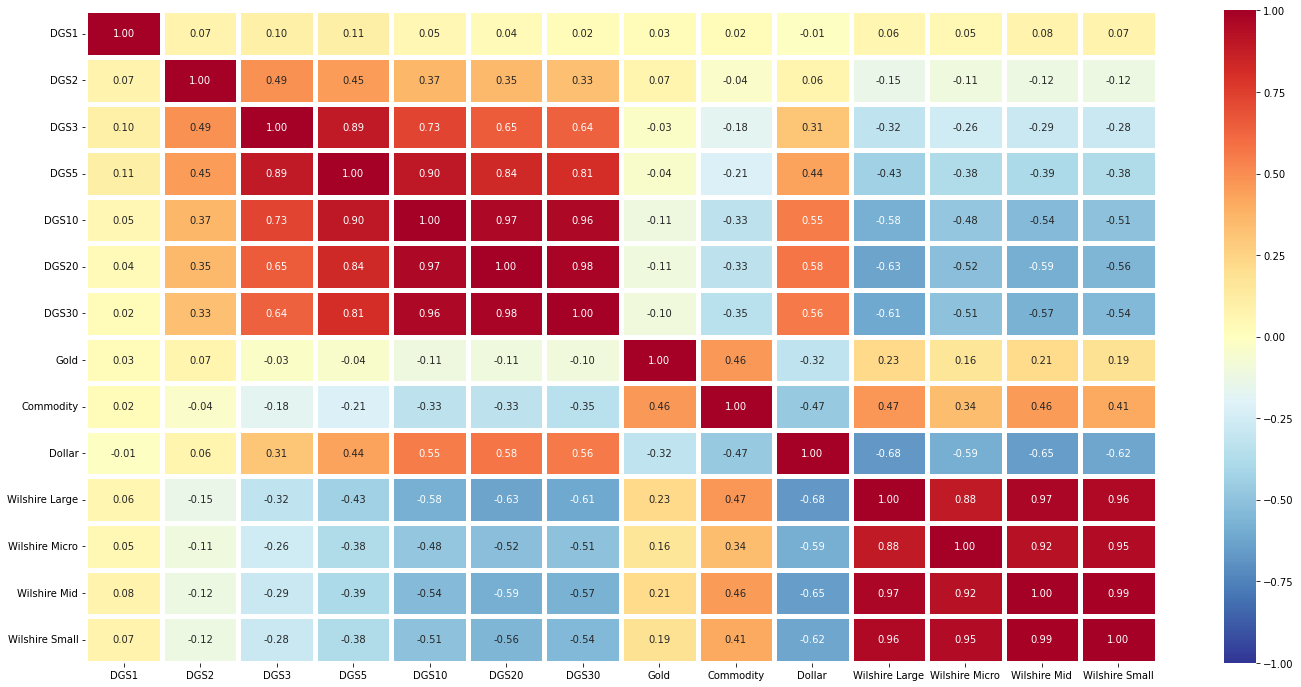

2012-01-21 00:00:00 ~ 2012-05-21 00:00:00


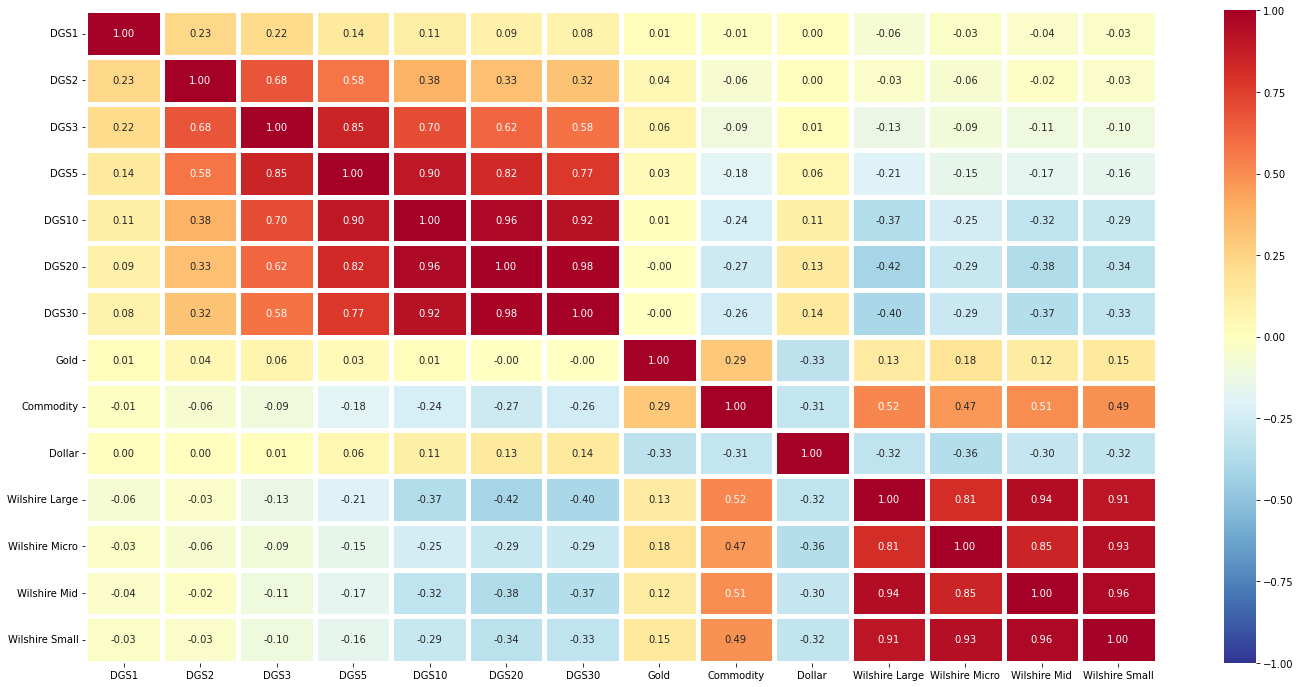

2012-05-19 00:00:00 ~ 2012-09-17 00:00:00


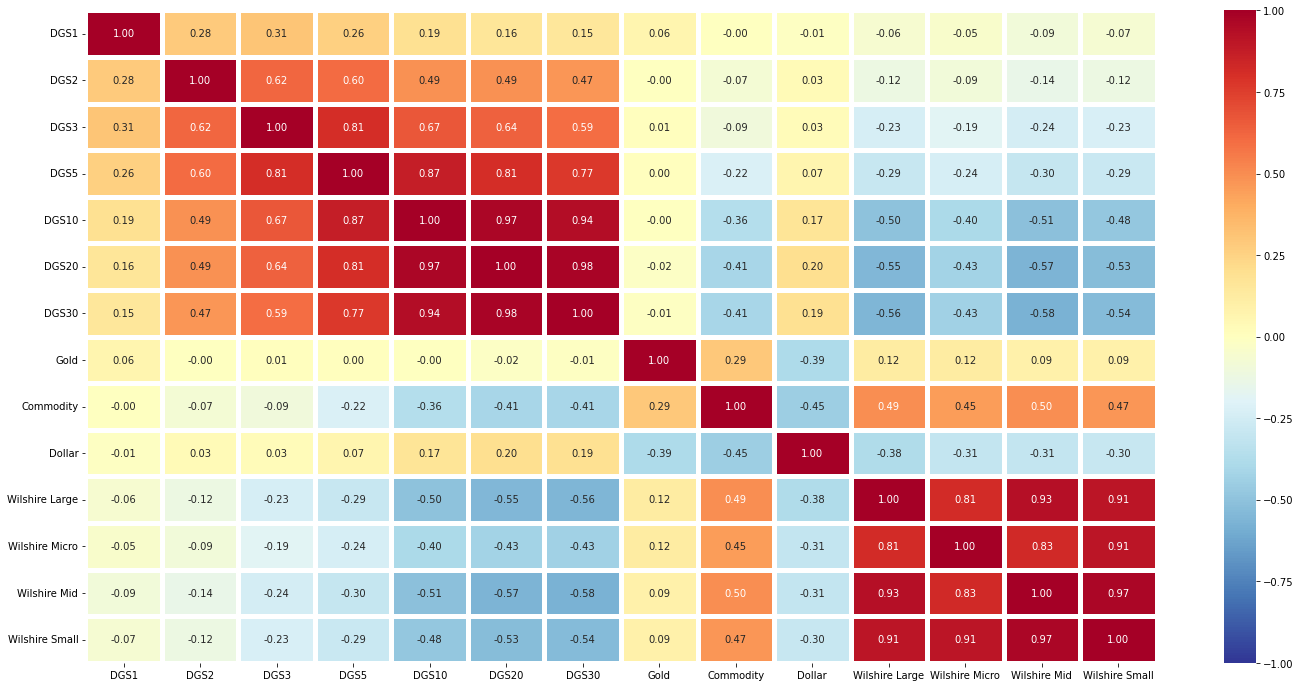

2012-09-15 00:00:00 ~ 2013-01-14 00:00:00


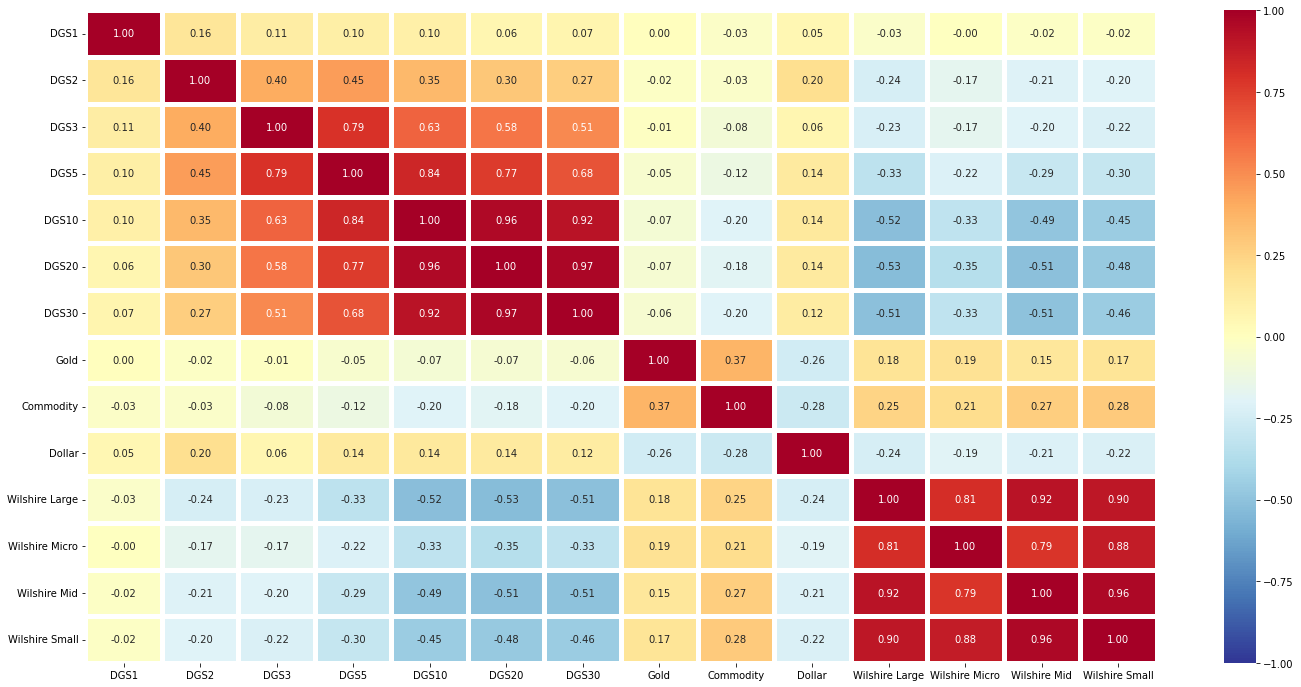

2013-01-12 00:00:00 ~ 2013-05-13 00:00:00


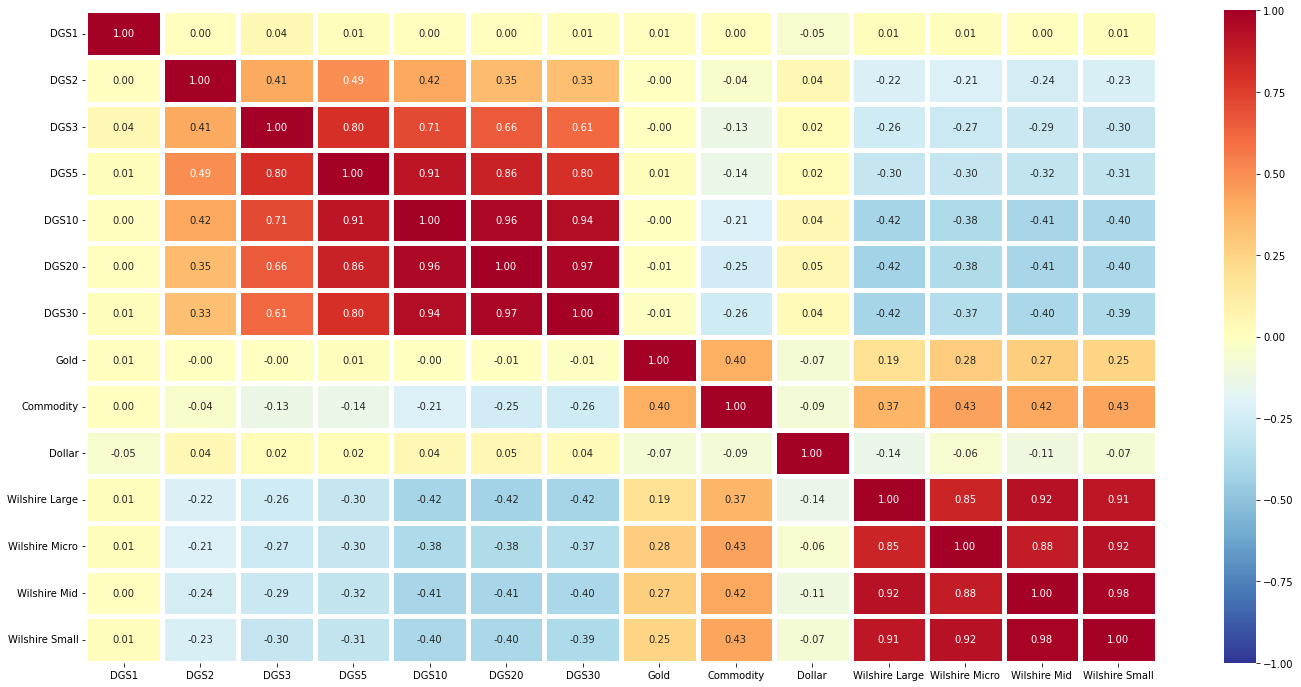

2013-05-11 00:00:00 ~ 2013-09-09 00:00:00


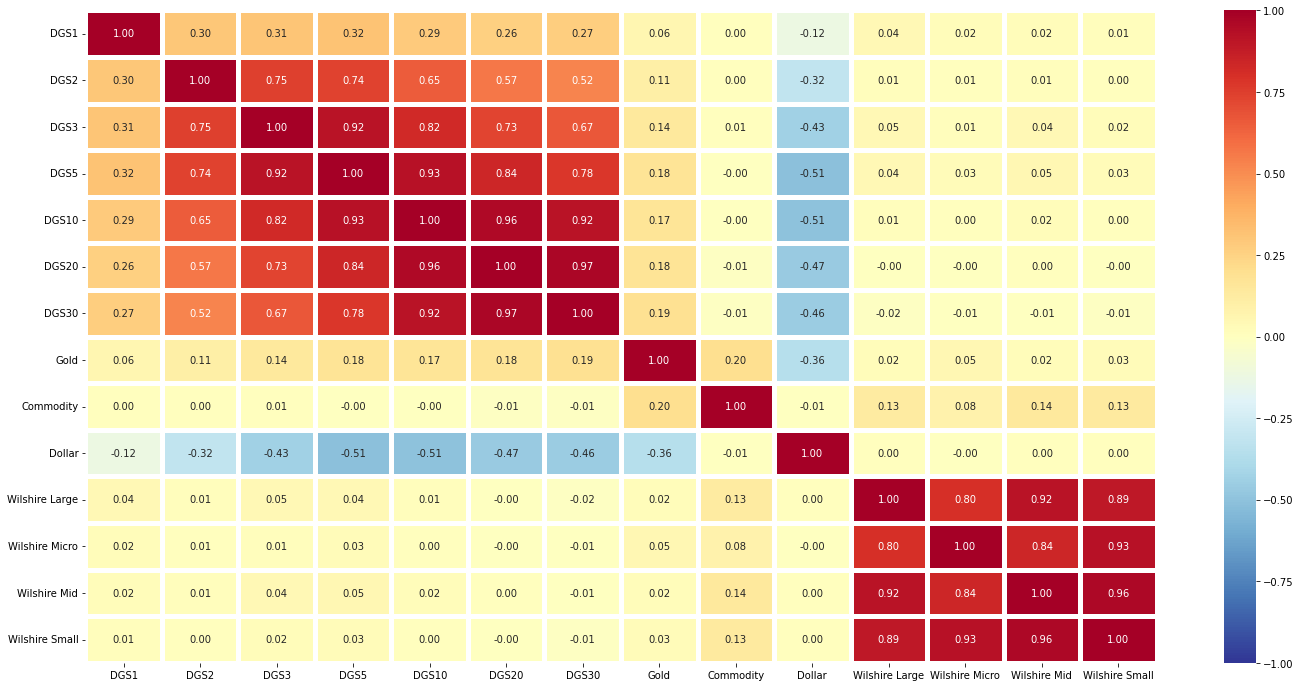

2013-09-07 00:00:00 ~ 2014-01-06 00:00:00


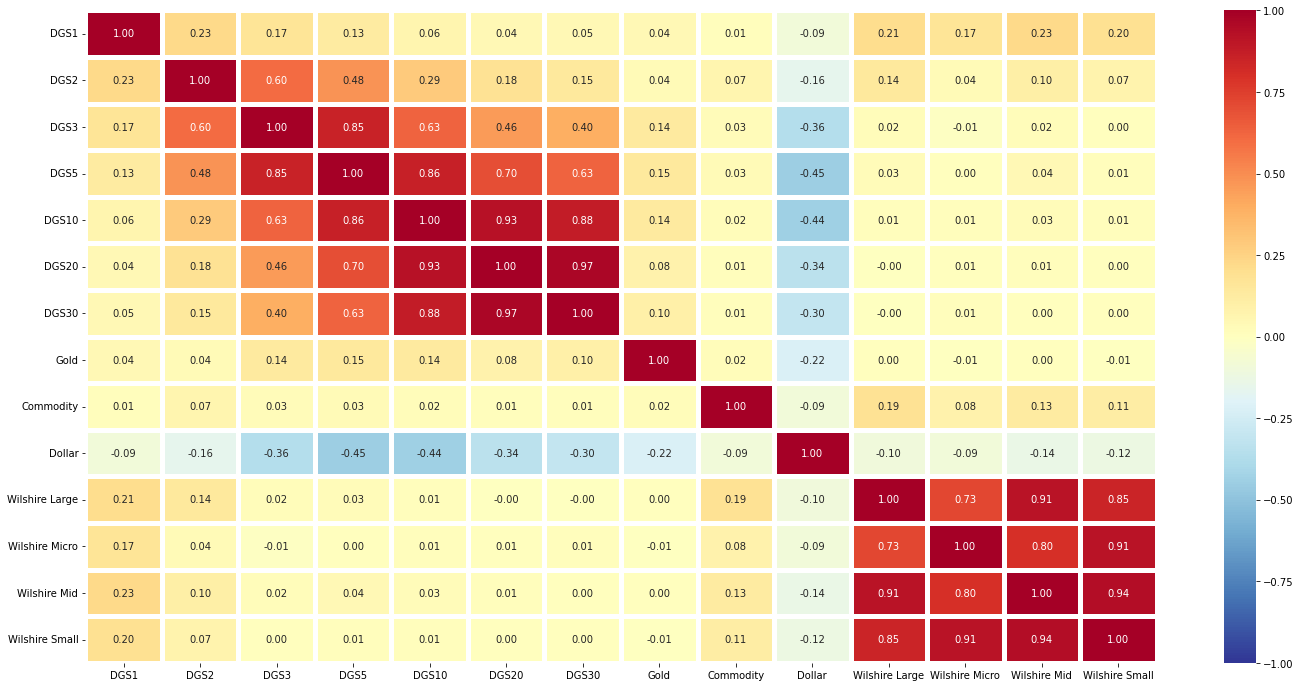

2014-01-04 00:00:00 ~ 2014-05-05 00:00:00


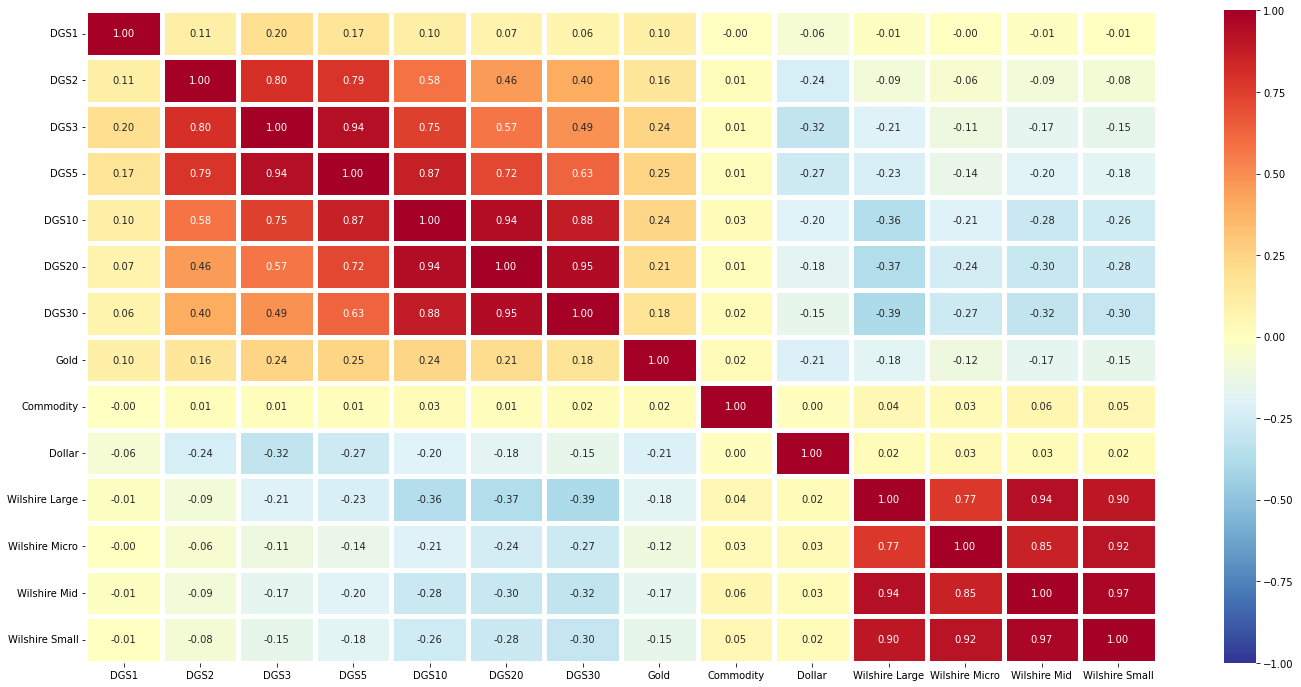

2014-05-03 00:00:00 ~ 2014-09-01 00:00:00


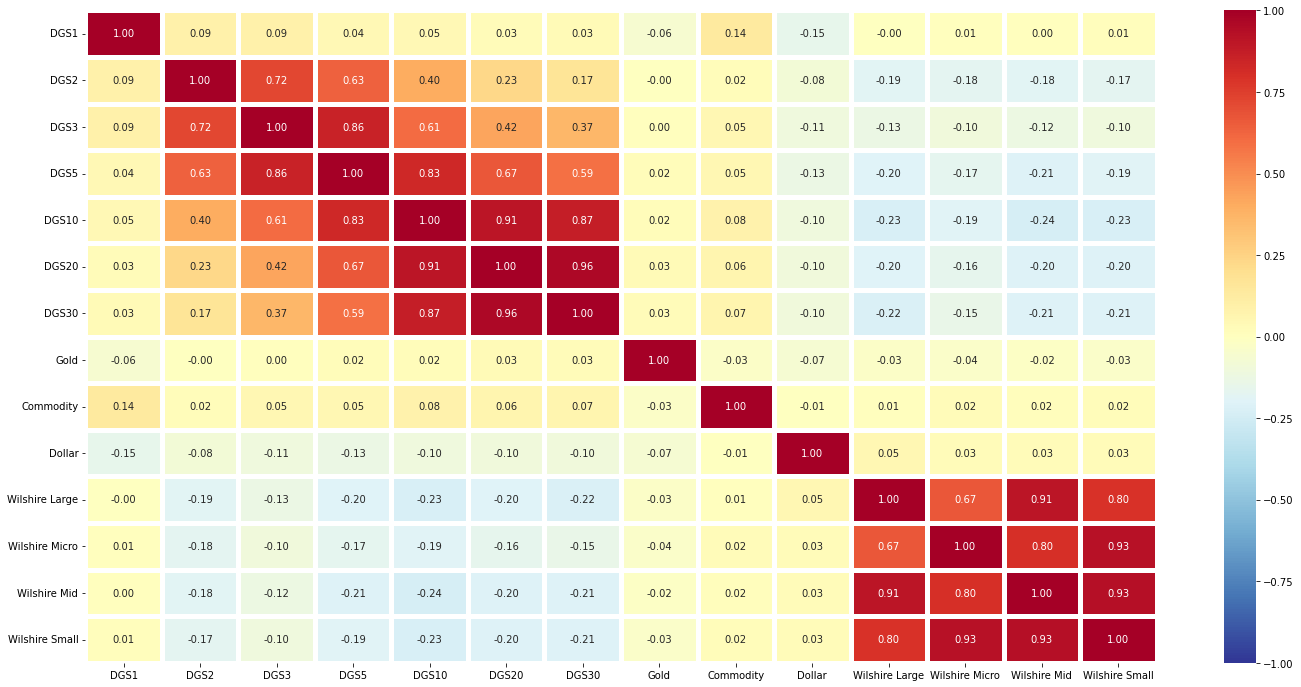

2014-08-30 00:00:00 ~ 2014-12-29 00:00:00


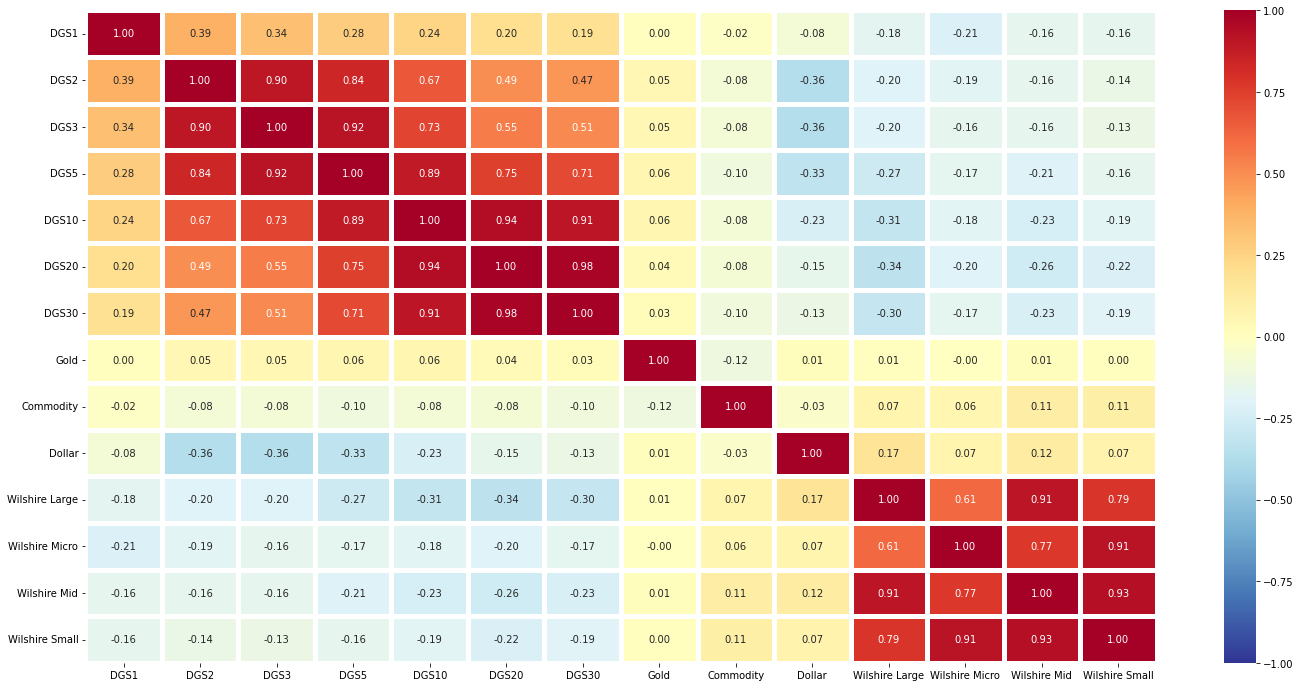

2014-12-27 00:00:00 ~ 2015-04-27 00:00:00


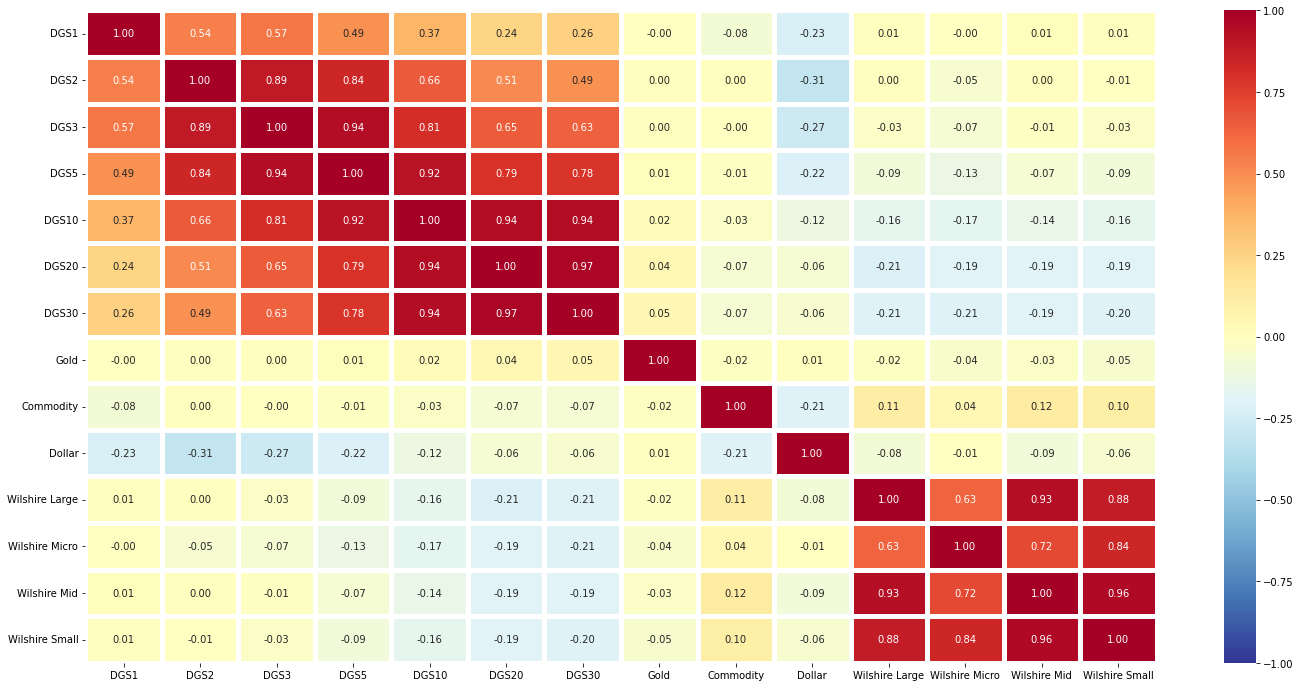

2015-04-25 00:00:00 ~ 2015-08-24 00:00:00


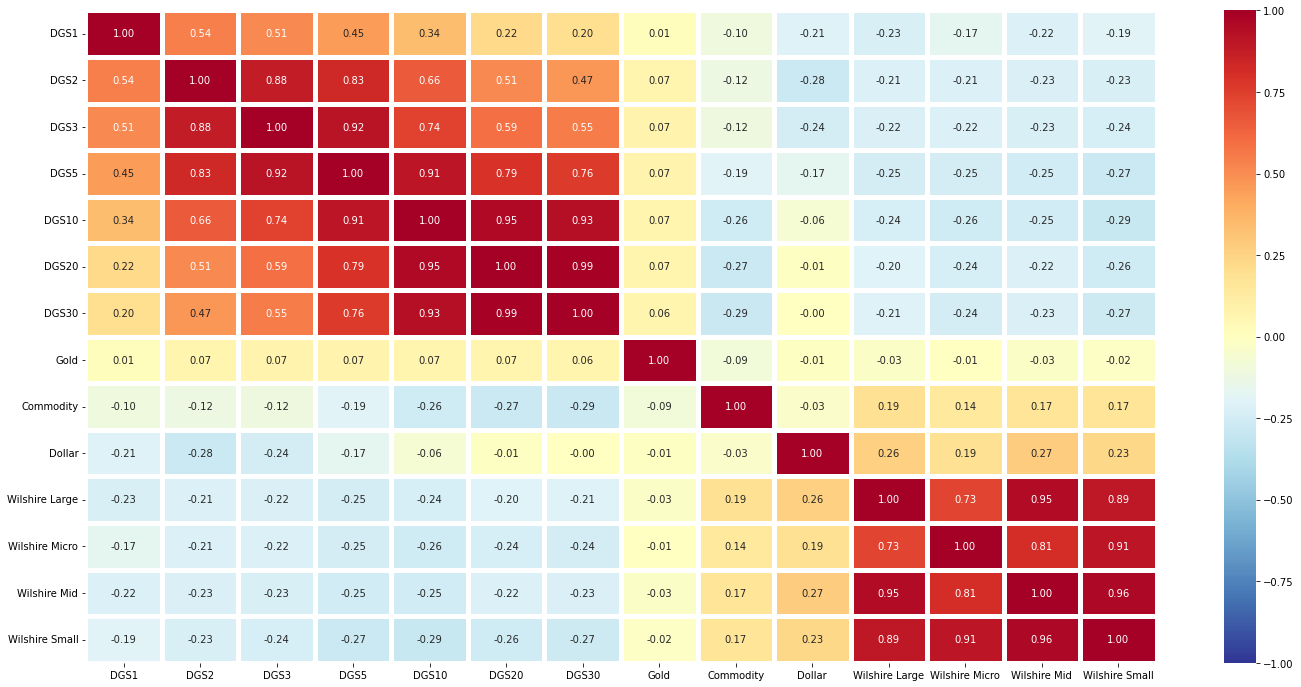

2015-08-22 00:00:00 ~ 2015-12-21 00:00:00


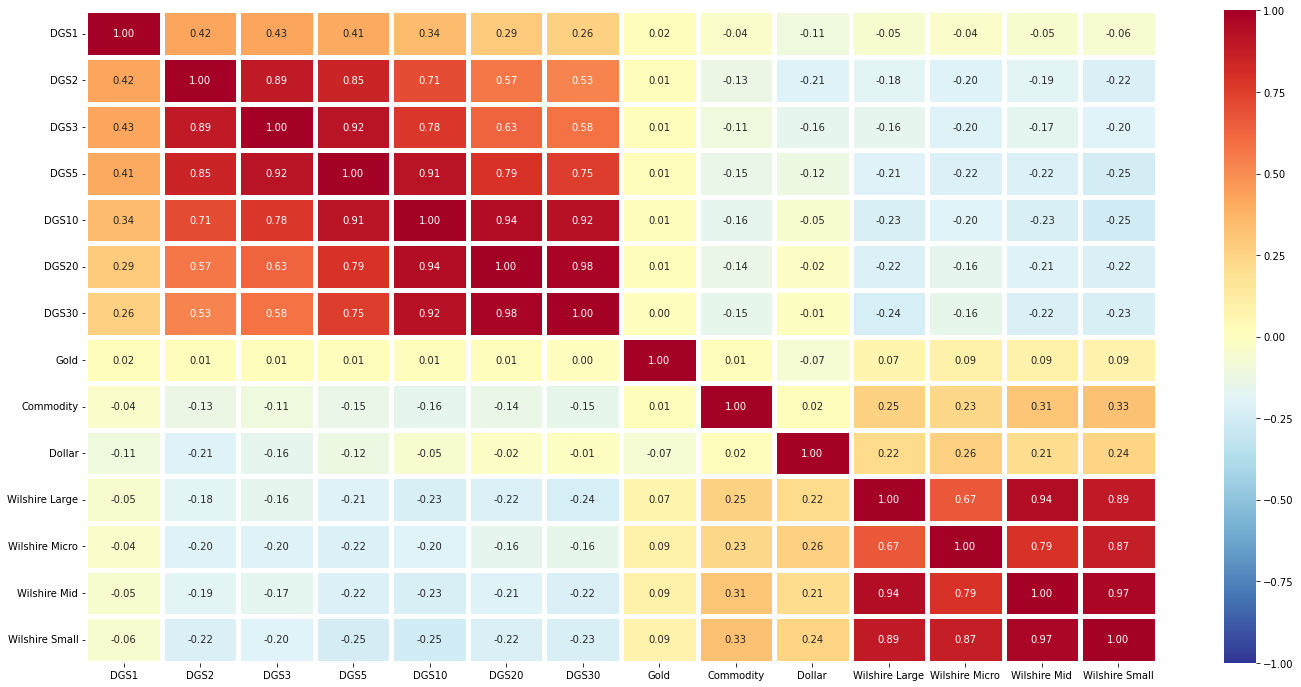

2015-12-19 00:00:00 ~ 2016-04-18 00:00:00


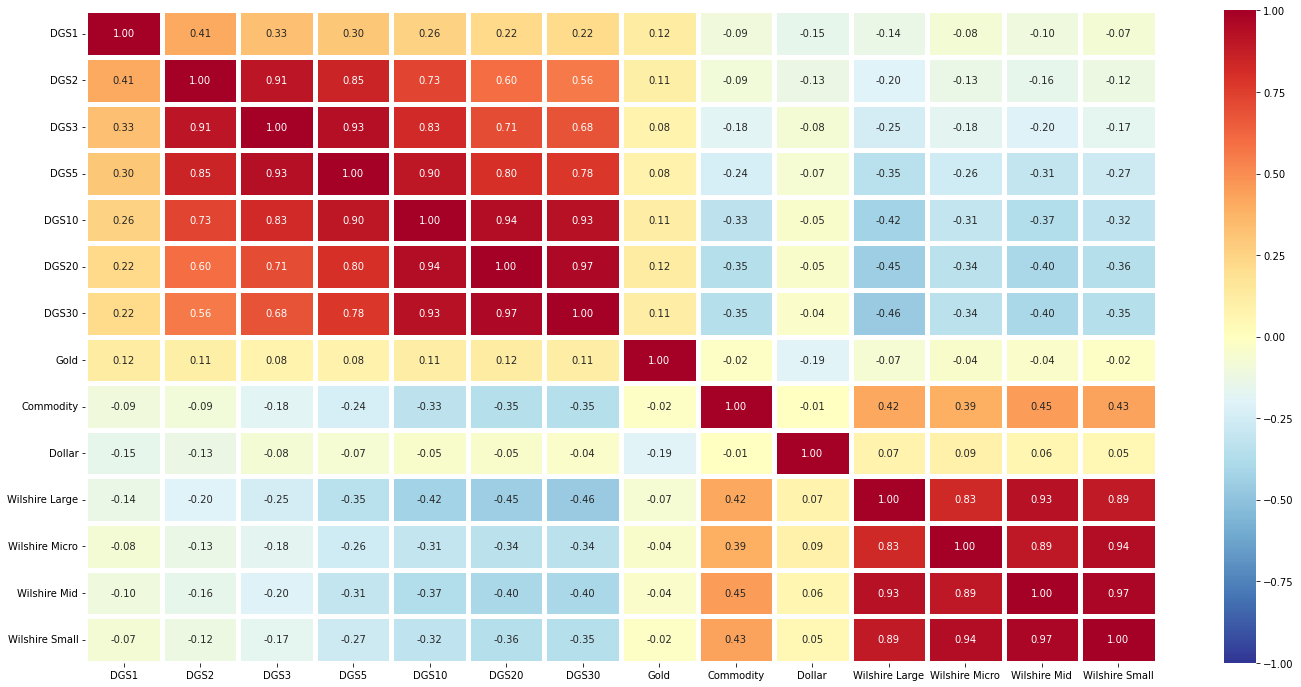

2016-04-16 00:00:00 ~ 2016-08-15 00:00:00


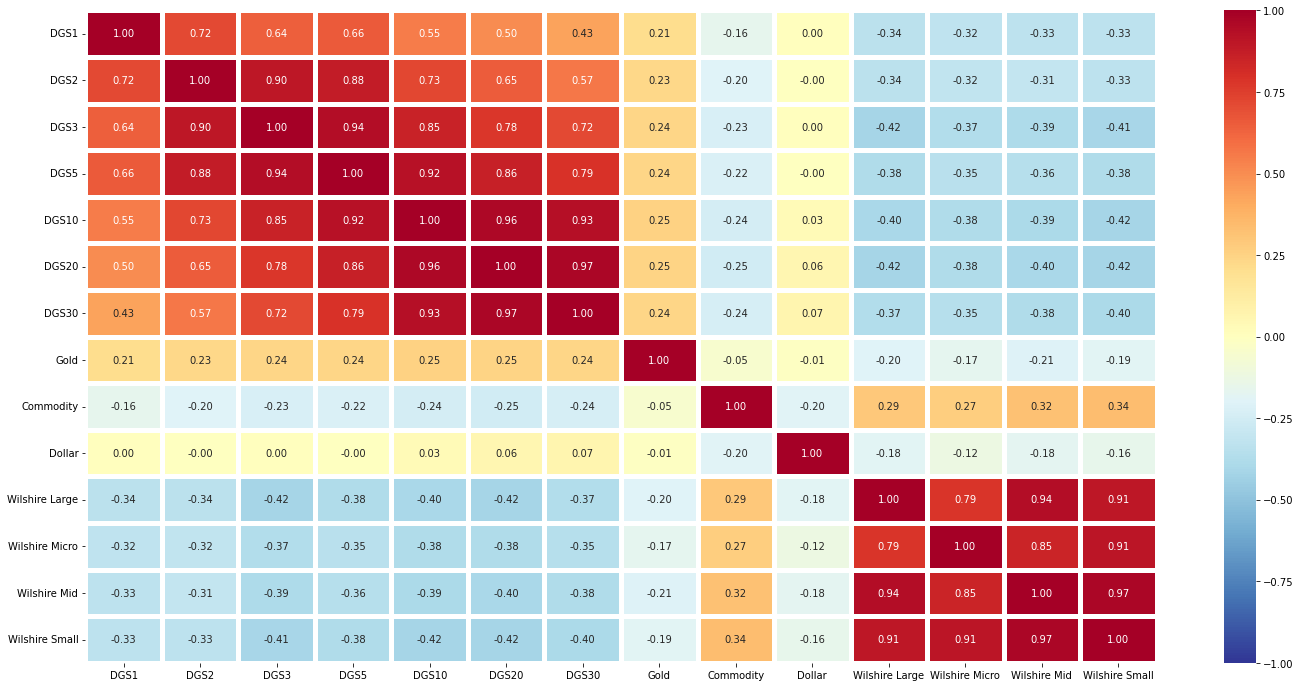

2016-08-13 00:00:00 ~ 2016-12-12 00:00:00


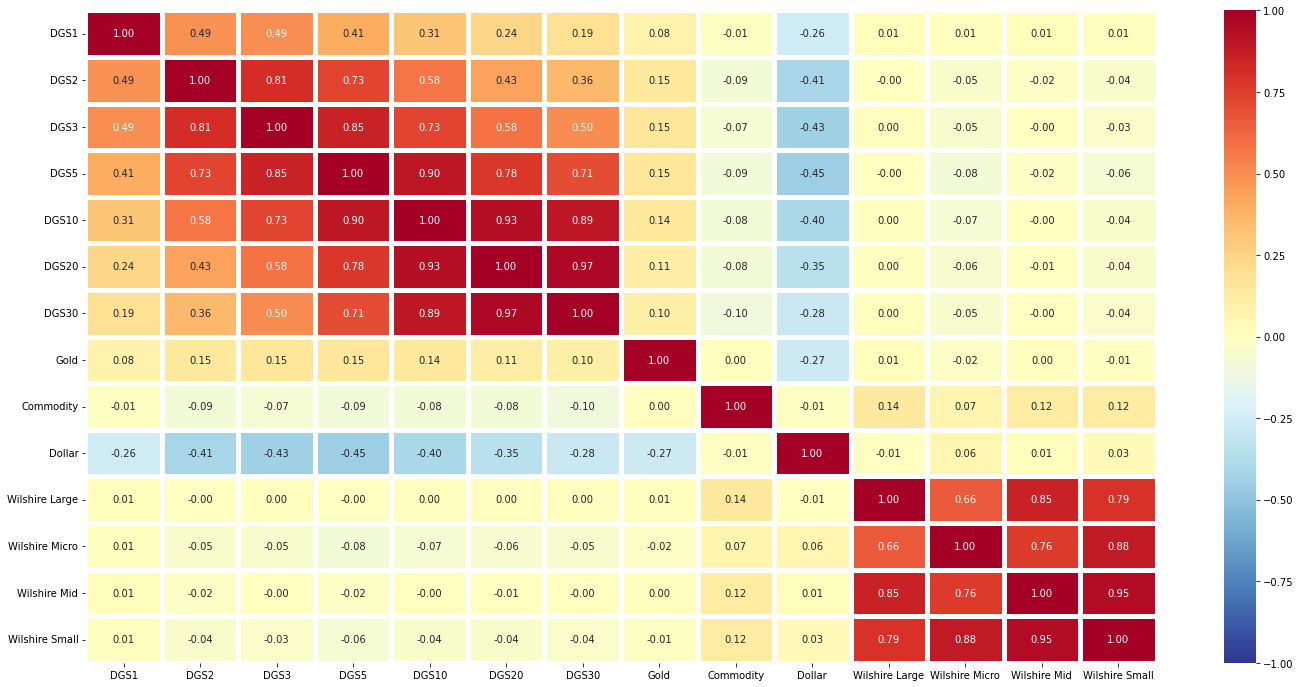

2016-12-10 00:00:00 ~ 2017-04-10 00:00:00


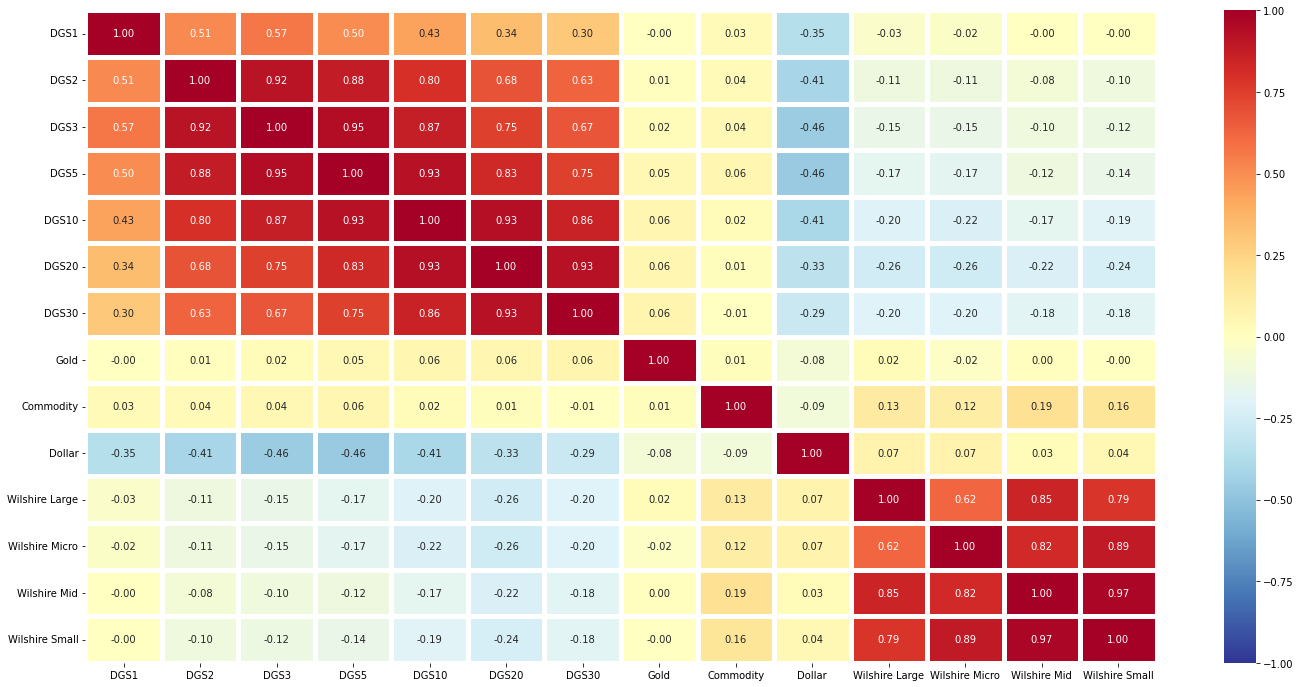

2017-04-08 00:00:00 ~ 2017-08-07 00:00:00


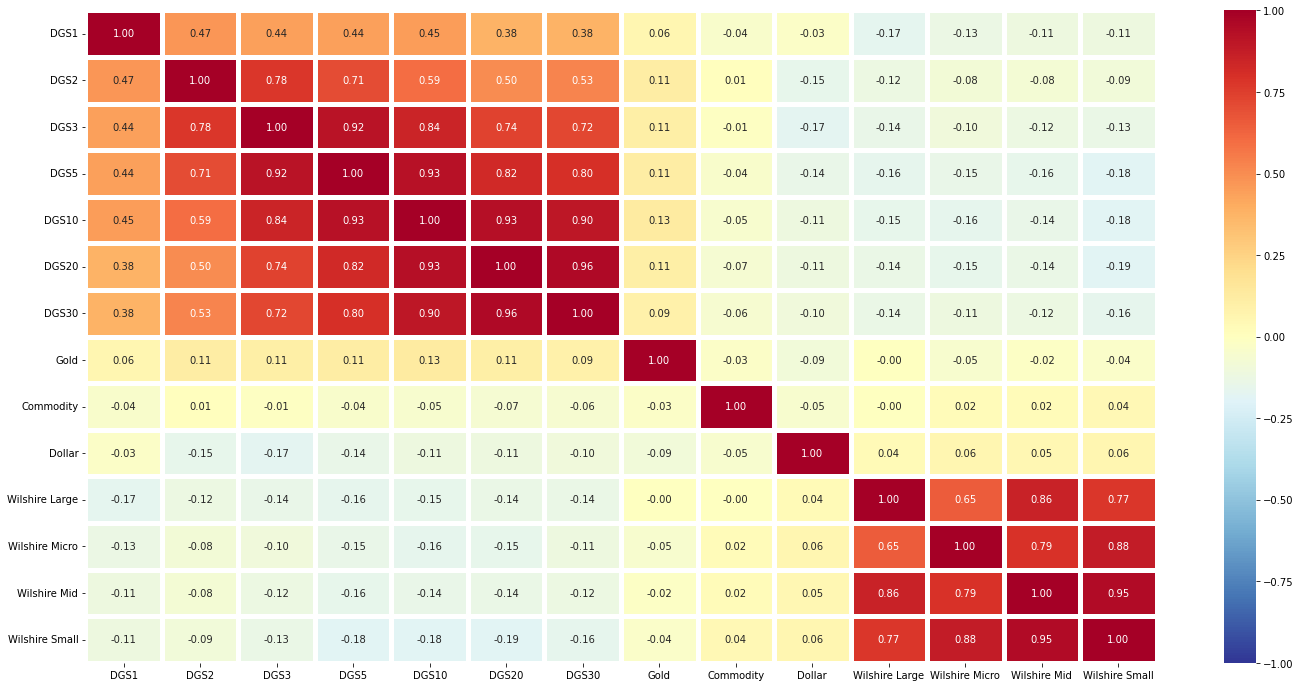

2017-08-05 00:00:00 ~ 2017-12-04 00:00:00


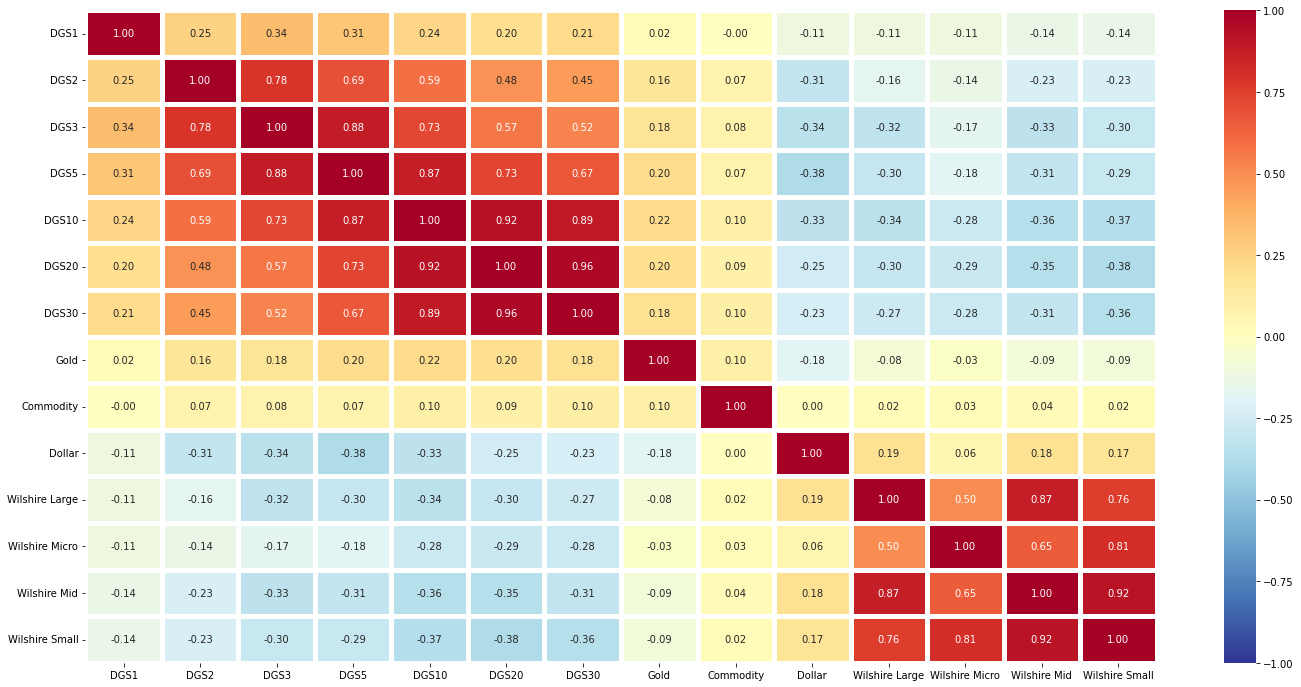

2017-12-02 00:00:00 ~ 2018-04-02 00:00:00


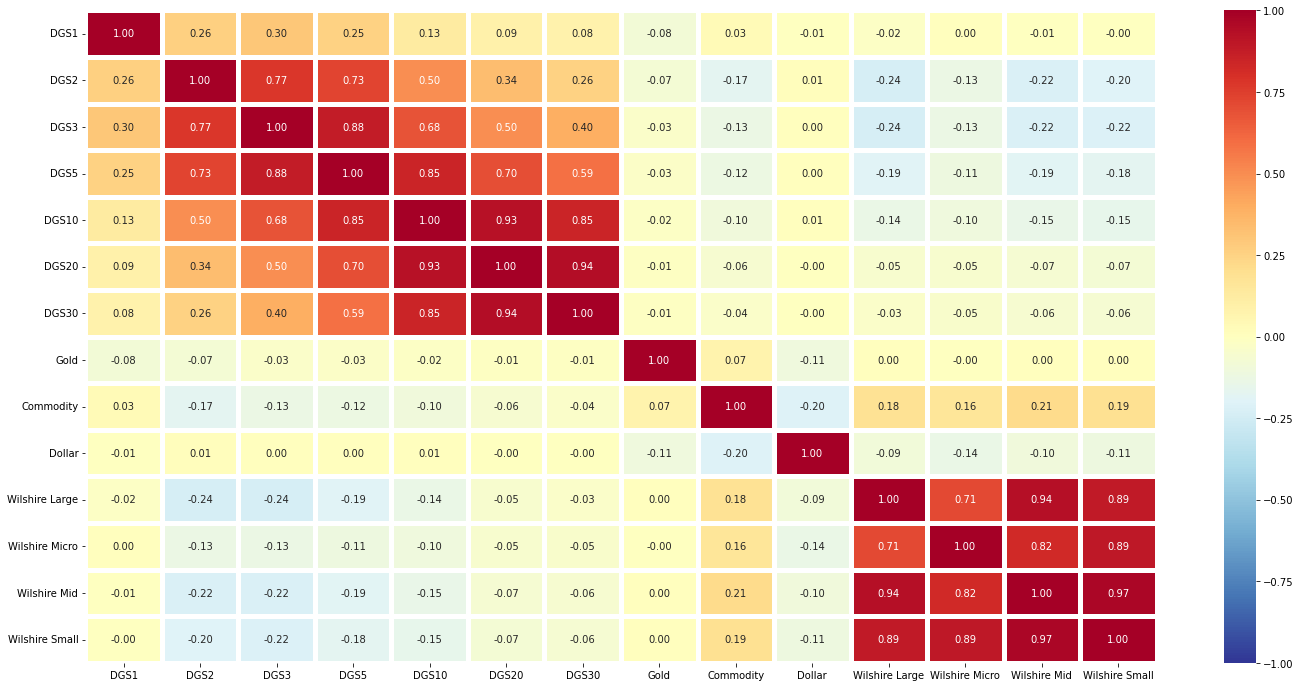

2018-03-31 00:00:00 ~ 2018-07-30 00:00:00


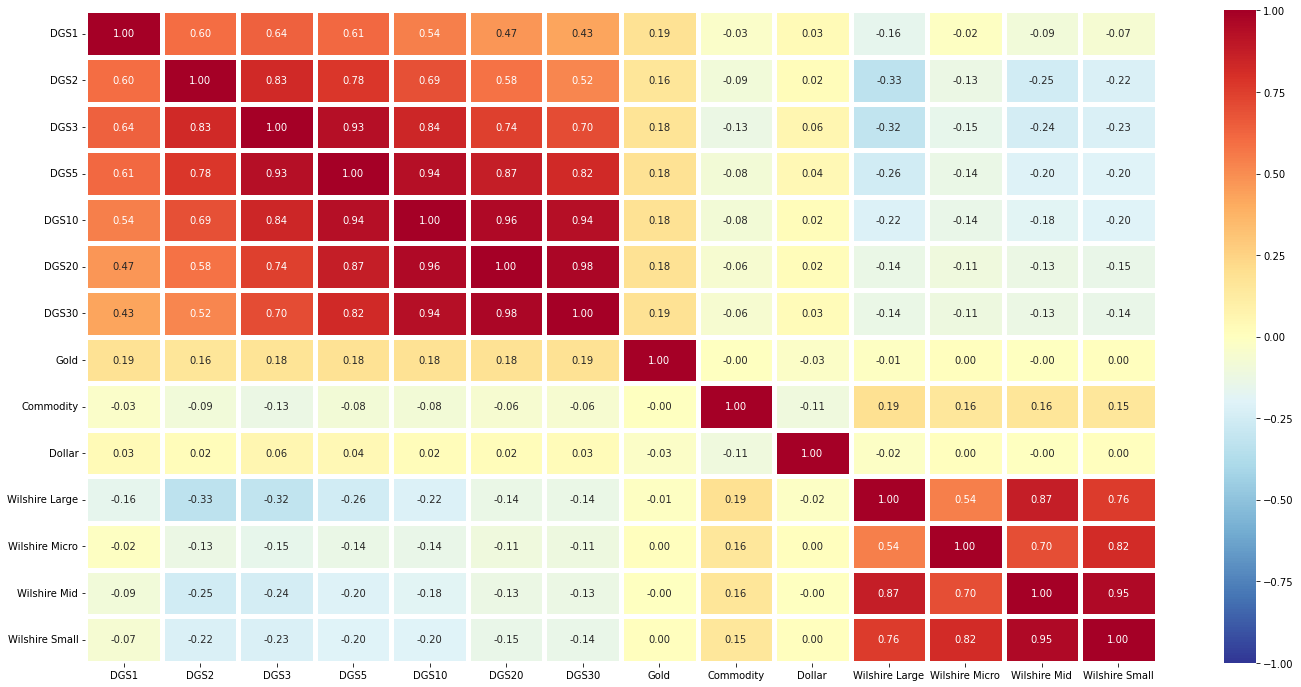

2018-07-28 00:00:00 ~ 2018-11-26 00:00:00


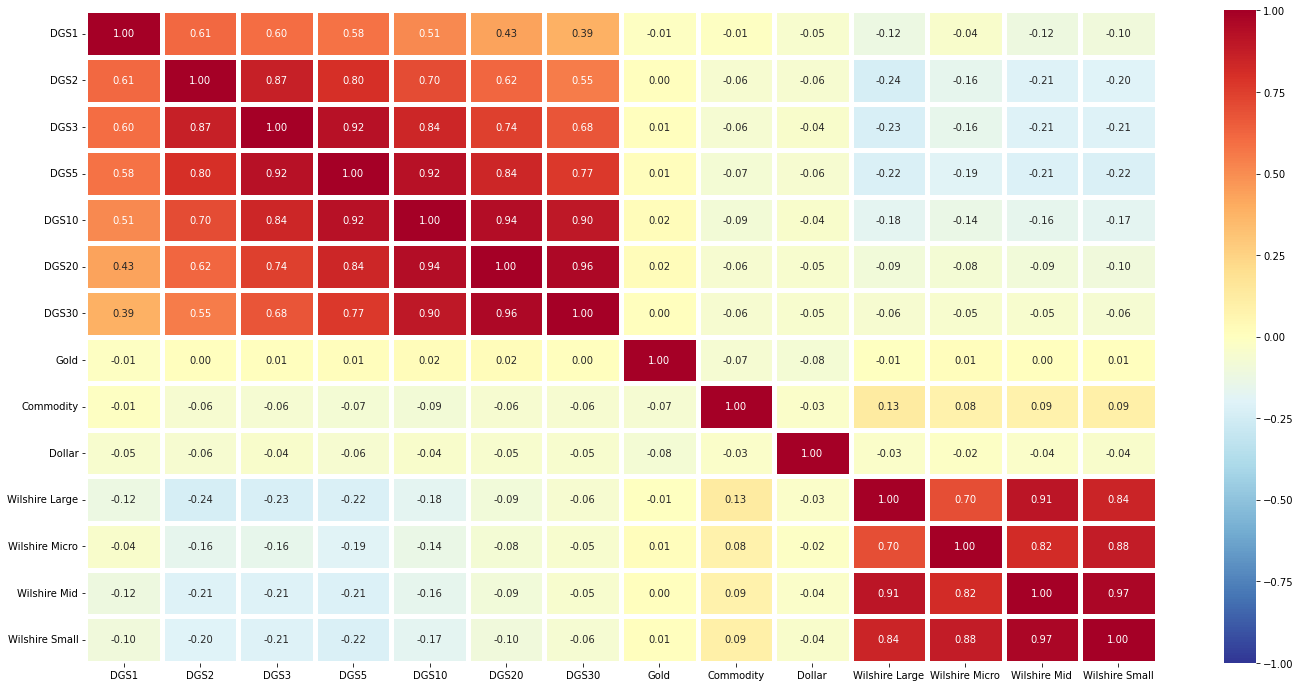

2018-11-24 00:00:00 ~ 2019-03-25 00:00:00


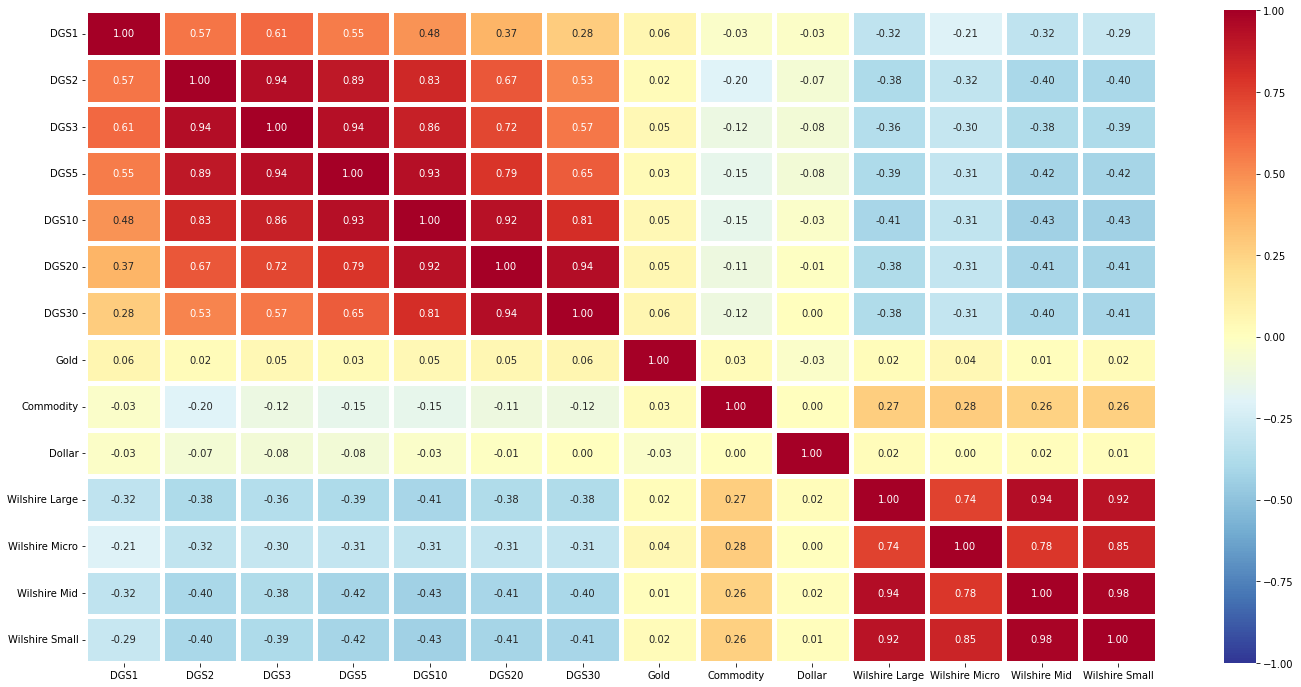

2019-03-23 00:00:00 ~ 2019-07-22 00:00:00


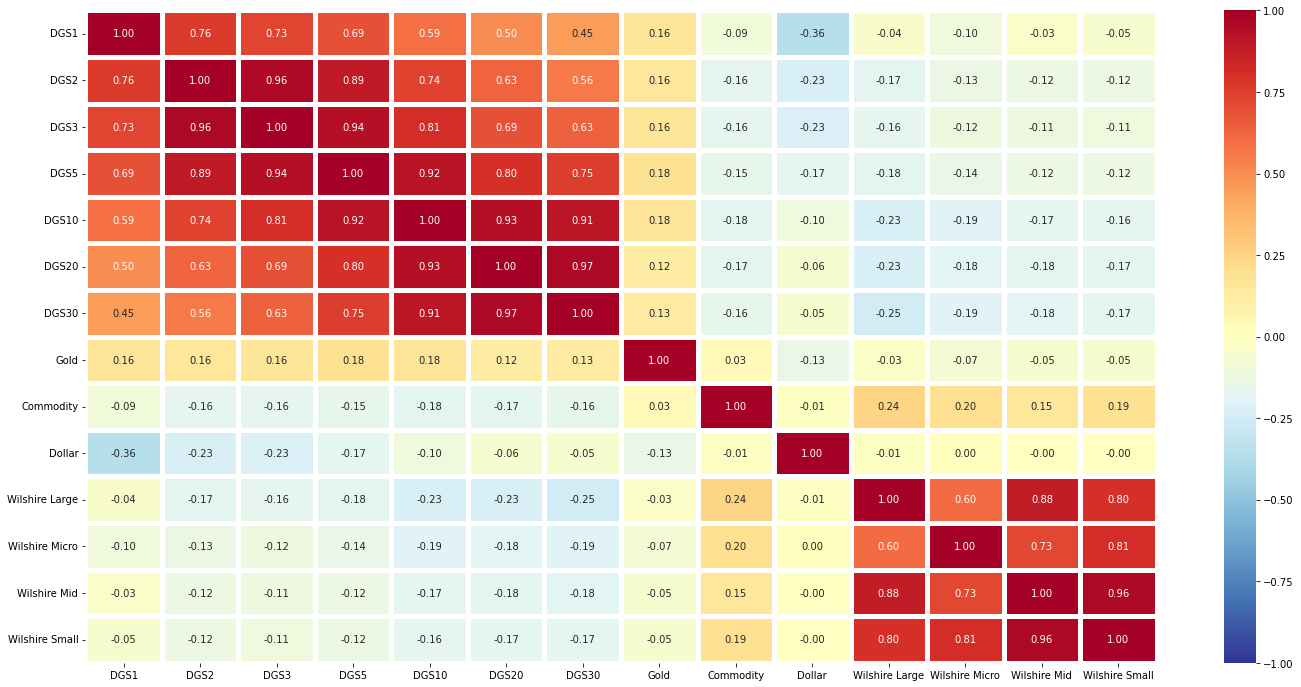

2019-07-20 00:00:00 ~ 2019-11-18 00:00:00


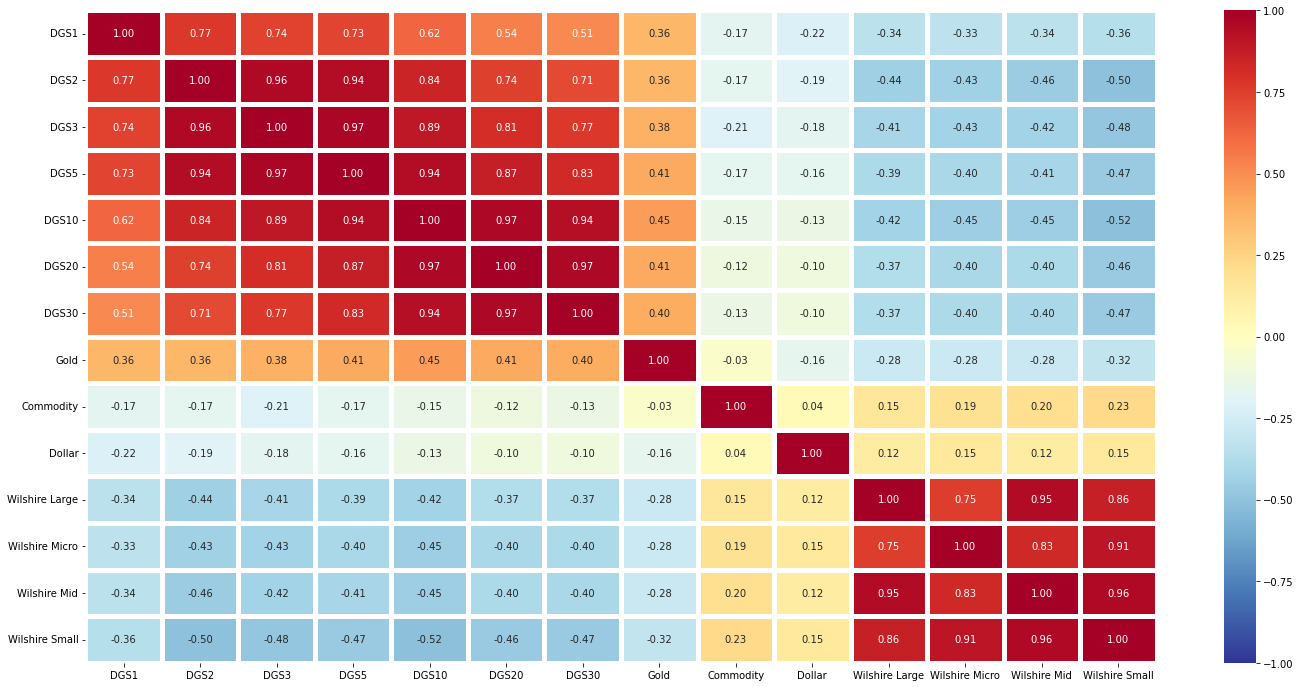

2019-11-16 00:00:00 ~ 2020-03-16 00:00:00


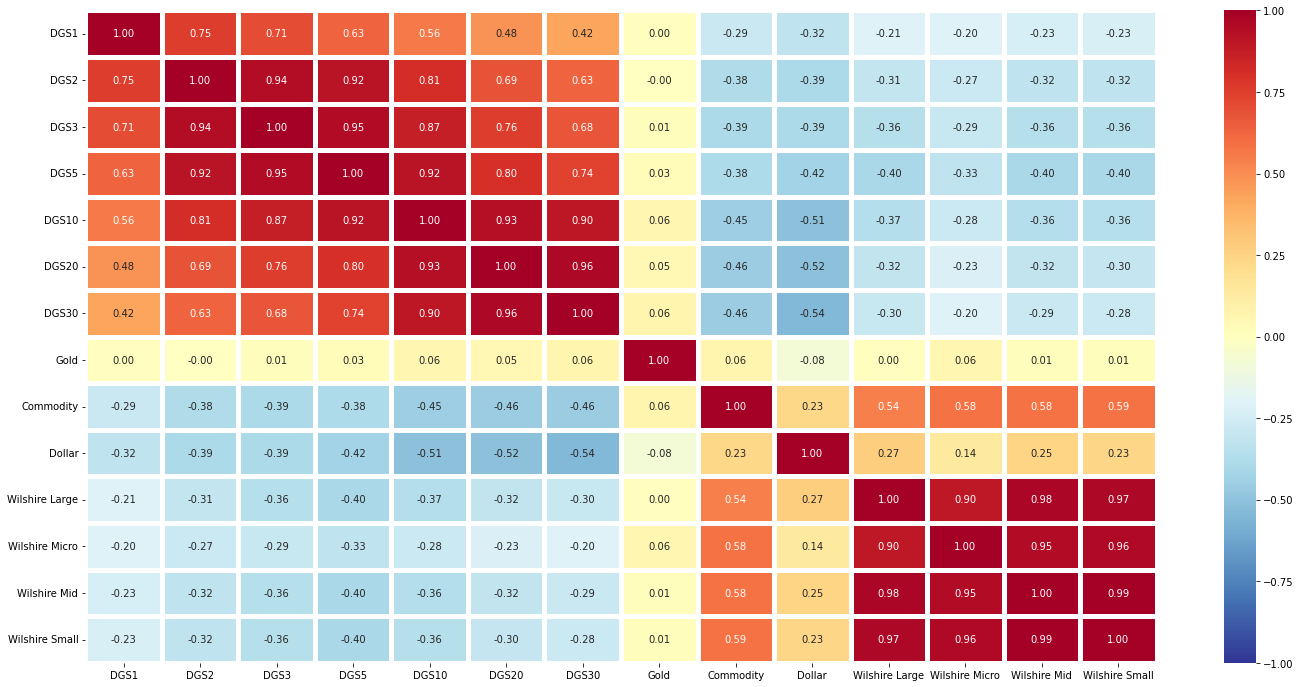

2020-03-14 00:00:00 ~ 2020-07-13 00:00:00


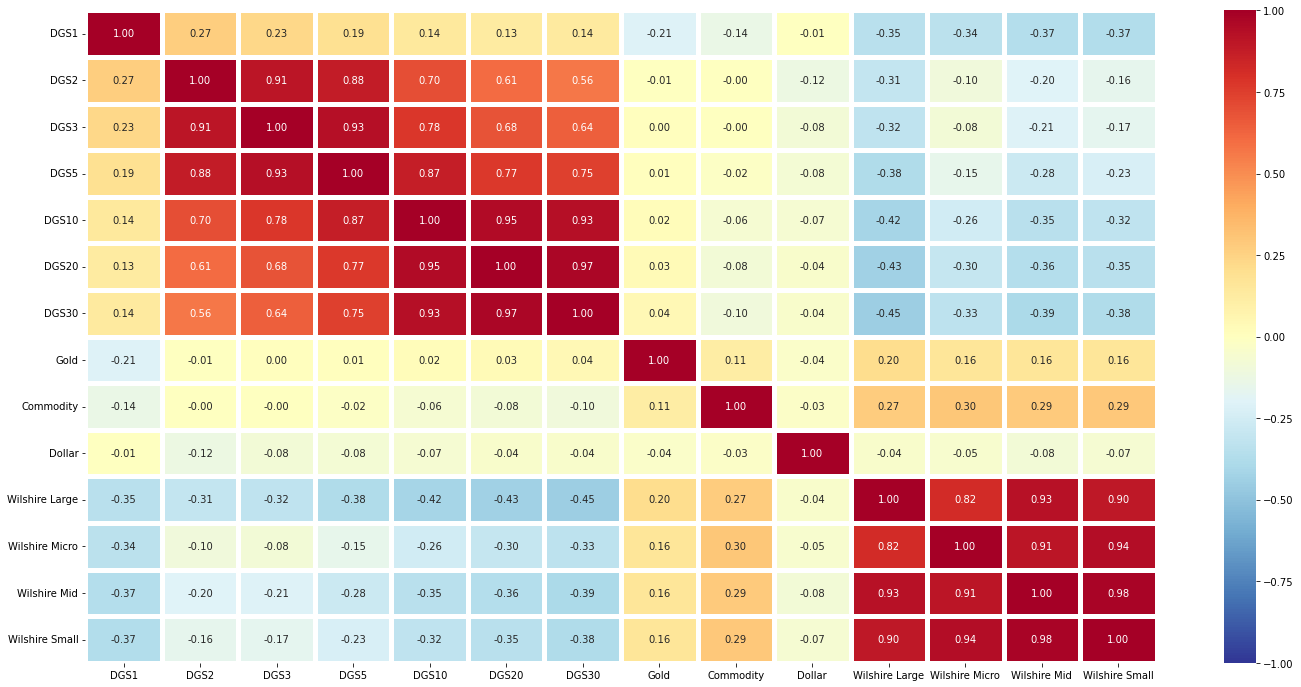

2020-07-11 00:00:00 ~ 2020-11-09 00:00:00


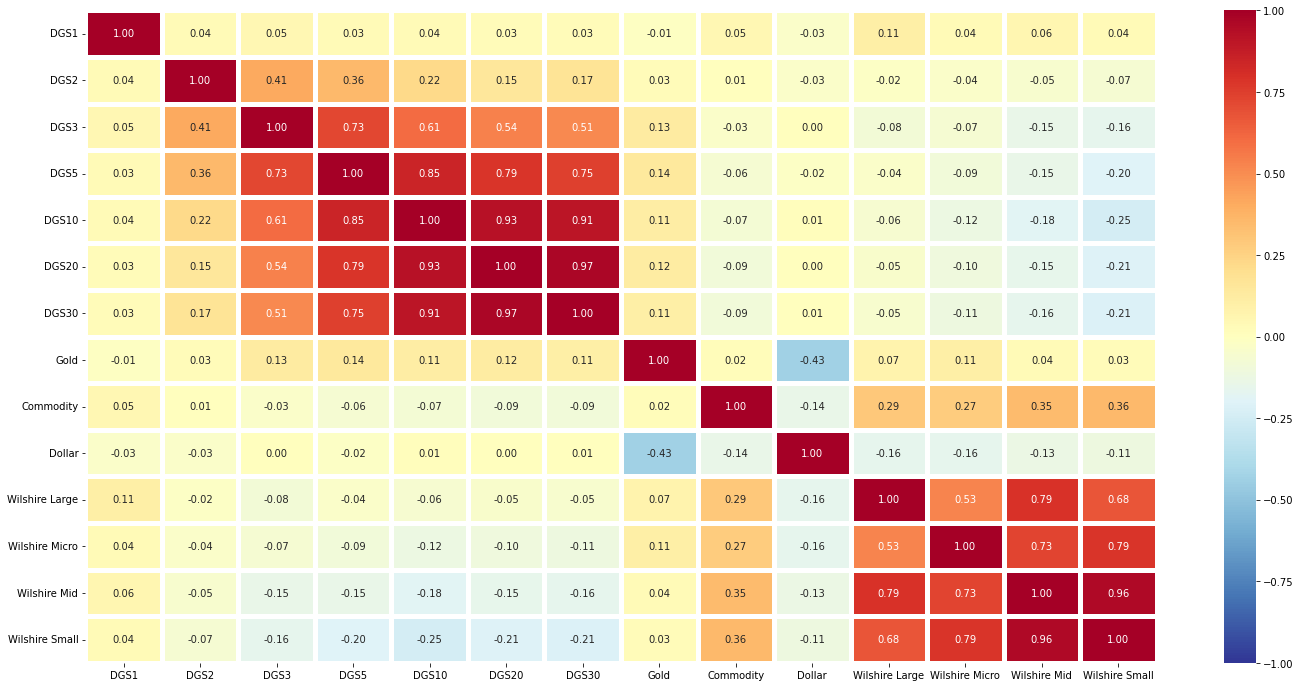

2020-11-07 00:00:00 ~ 2021-03-08 00:00:00


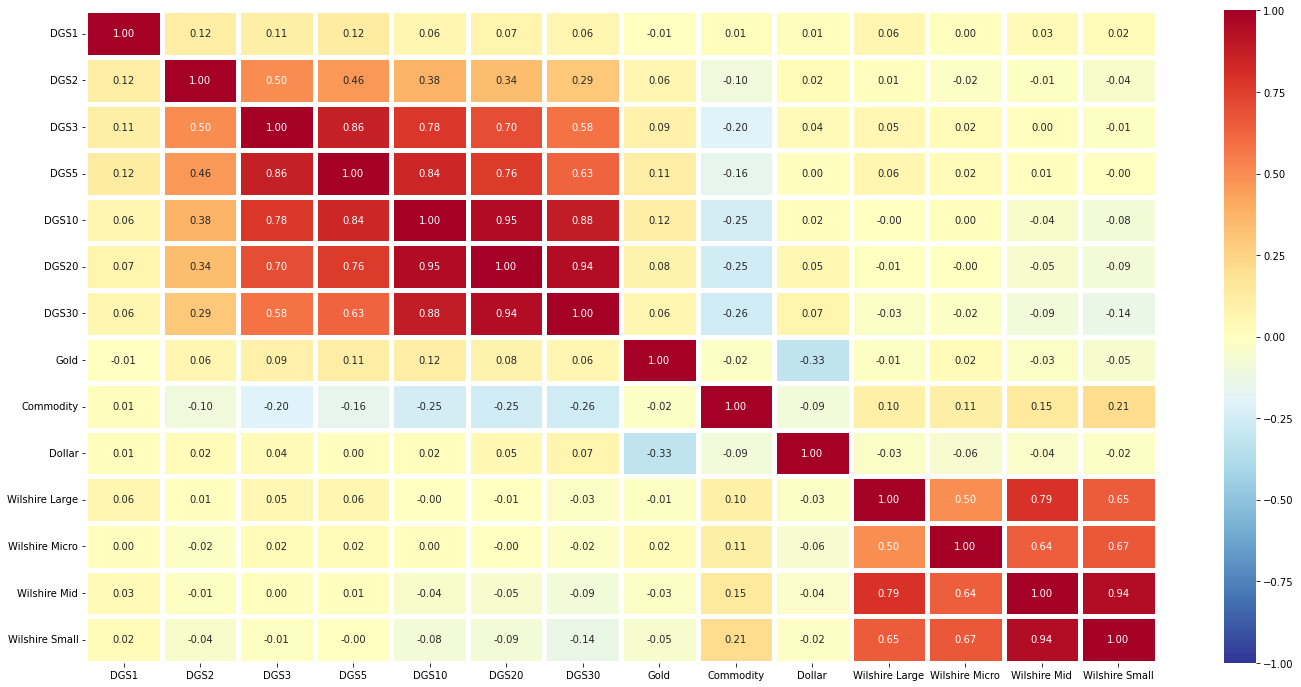

2021-03-06 00:00:00 ~ 2021-07-05 00:00:00


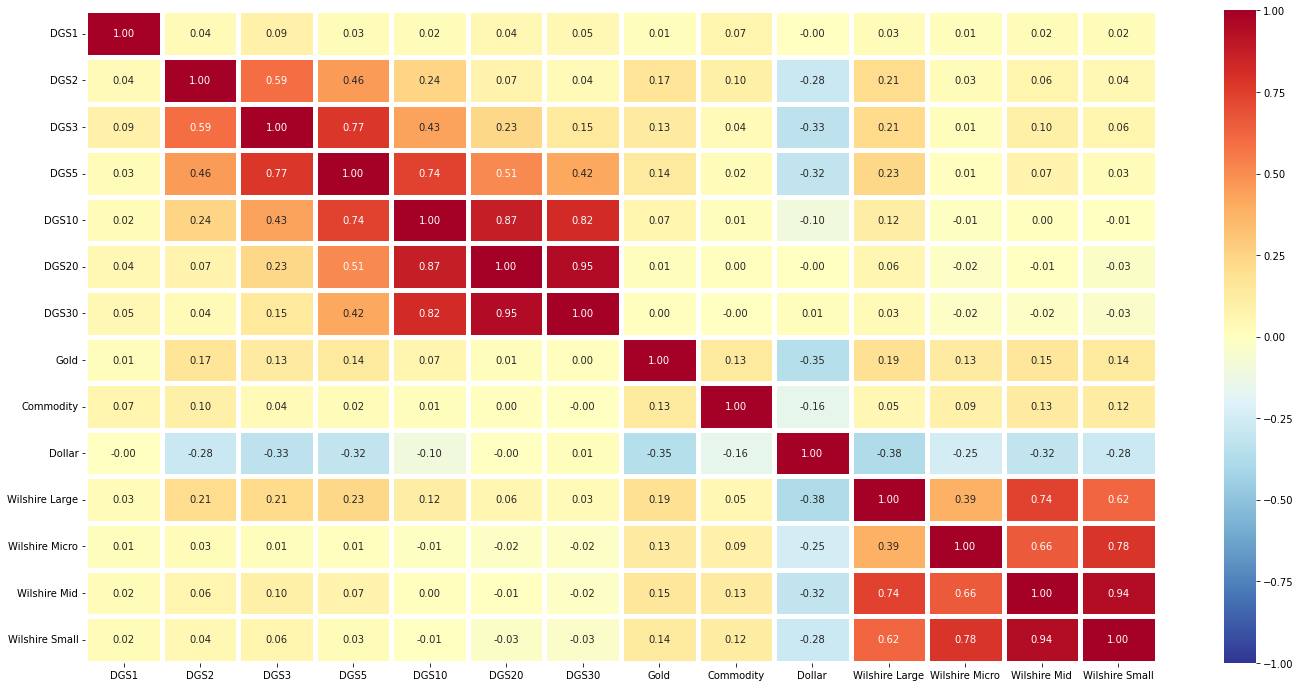

In [63]:
for i in range(len(test)):
    print(test[i].index[0],'~',test[i].index[-1])
    corr = test[i].corr()
    for j in range(len(corr.columns)):
        corr[corr.columns[j]] = corr[corr.columns[j]].apply(lambda x: np.sign(x)*abs(x)**1.5)

    plt.figure()
    sns.heatmap(data=corr, annot=True, fmt='.2f', linewidths=5,cmap='RdYlBu_r', vmax=1,vmin=-1)

    plt.show() 
